## **Predicting Blog Feedback**


### DSBA 6156, Spring 2022



## Joel Reji
## Imad Ahmad

##### BlogFeedback Data Set:
https://archive.ics.uci.edu/ml/datasets/BlogFeedback

# Load Libraries

In [1]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')

# **Creating the training dataframe**

In [2]:
# Specify column headers
col_headers = ["mean_totalcommentsBefore_Source", "std_totalcommentsBefore_Source", "min_totalcommentsBefore_Source", "max_totalcommentsBefore_Source", "median_totalcommentsBefore_Source", "mean_comments24Before_Source", "std_comments24Before_Source", "min_comments24Before_Source", "max_comments24Before_Source", "median_comments24Before_Source", 
               "mean_commentsIntervalBefore_Source", "std_commentsIntervalBefore_Source", "min_commentsIntervalBefore_Source", "max_commentsIntervalBefore_Source", "median_commentsIntervalBefore_Source", "mean_comments24After_Source", "std_comments24After_Source", "min_comments24After_Source", "max_comments24After_Source", "median_comments24After_Source",
               "mean_comments24Interval_Source", "std_comments24Interval_Source", "min_comments24Interval_Source", "max_comments24Interval_Source", "median_comments24Interval_Source", "mean_totallinksBefore_Source", "std_totallinksBefore_Source", "min_totallinksBefore_Source", "max_totallinksBefore_Source", "median_totallinksBefore_Source", "mean_links24Before_Source", 
               "std_links24Before_Source", "min_links24Before_Source", "max_links24Before_Source", "median_links24Before_Source", "mean_linksIntervalBefore_Source", "std_linksIntervalBefore_Source", "min_linksIntervalBefore_Source", "max_linksIntervalBefore_Source", "median_linksIntervalBefore_Source", "mean_links24After_Source", "std_links24After_Source", 
               "min_links24After_Source", "max_links24After_Source", "median_links24After_Source","mean_links24Interval_Source", "std_links24Interval_Source", "min_links24Interval_Source", "max_links24Interval_Source", "median_link24Interval_Source", "totalcommentsBefore_Post", "comments24Before_Post", "commentsIntervalBefore_Post", "comments24After_Post",
               "comments24Interval_Post","totallinksBefore_Post", "links24Before_Post", "linksIntervalBefore_Post", "links24After_Post","links24Interval_Post", "timeIntervalPub_Post", "Length_Post", "1_bag0fWords_Post", "2_bag0fWords_Post", "3_bag0fWords_Post", "4_bag0fWords_Post", "5_bag0fWords_Post", "6_bagOfWords_Post","7_bagOfWords_Post",'8_bagOfWords_Post',
               '9_bagOfWords_Post','10_bagOfWords_Post','11_bagOfWords_Post','12_bagOfWords_Post','13_bagOfWords_Post','14_bagOfWords_Post','15_bagOfWords_Post','16_bagOfWords_Post','17_bagOfWords_Post','18_bagOfWords_Post','19_bagOfWords_Post','20_bagOfWords_Post','21_bagOfWords_Post','22_bagOfWords_Post','23_bagOfWords_Post','24_bagOfWords_Post',
               '25_bagOfWords_Post','26_bagOfWords_Post','27_bagOfWords_Post','28_bagOfWords_Post','29_bagOfWords_Post','30_bagOfWords_Post','31_bagOfWords_Post','32_bagOfWords_Post','33_bagOfWords_Post','34_bagOfWords_Post','35_bagOfWords_Post','36_bagOfWords_Post','37_bagOfWords_Post','38_bagOfWords_Post','39_bagOfWords_Post','40_bagOfWords_Post',
               '41_bagOfWords_Post','42_bagOfWords_Post','43_bagOfWords_Post','44_bagOfWords_Post','45_bagOfWords_Post','46_bagOfWords_Post','47_bagOfWords_Post','48_bagOfWords_Post','49_bagOfWords_Post','50_bagOfWords_Post','51_bagOfWords_Post','52_bagOfWords_Post','53_bagOfWords_Post','54_bagOfWords_Post','55_bagOfWords_Post','56_bagOfWords_Post',
               '57_bagOfWords_Post','58_bagOfWords_Post','59_bagOfWords_Post','60_bagOfWords_Post','61_bagOfWords_Post','62_bagOfWords_Post','63_bagOfWords_Post','64_bagOfWords_Post','65_bagOfWords_Post','66_bagOfWords_Post','67_bagOfWords_Post','68_bagOfWords_Post','69_bagOfWords_Post','70_bagOfWords_Post','71_bagOfWords_Post','72_bagOfWords_Post',
               '73_bagOfWords_Post','74_bagOfWords_Post','75_bagOfWords_Post','76_bagOfWords_Post','77_bagOfWords_Post','78_bagOfWords_Post','79_bagOfWords_Post','80_bagOfWords_Post','81_bagOfWords_Post','82_bagOfWords_Post','83_bagOfWords_Post','84_bagOfWords_Post','85_bagOfWords_Post','86_bagOfWords_Post','87_bagOfWords_Post','88_bagOfWords_Post',
               '89_bagOfWords_Post','90_bagOfWords_Post','91_bagOfWords_Post','92_bagOfWords_Post','93_bagOfWords_Post','94_bagOfWords_Post','95_bagOfWords_Post','96_bagOfWords_Post','97_bagOfWords_Post','98_bagOfWords_Post','99_bagOfWords_Post','100_bagOfWords_Post','101_bagOfWords_Post','102_bagOfWords_Post','103_bagOfWords_Post','104_bagOfWords_Post',
               '105_bagOfWords_Post','106_bagOfWords_Post','107_bagOfWords_Post','108_bagOfWords_Post','109_bagOfWords_Post','110_bagOfWords_Post','111_bagOfWords_Post','112_bagOfWords_Post','113_bagOfWords_Post','114_bagOfWords_Post','115_bagOfWords_Post','116_bagOfWords_Post','117_bagOfWords_Post','118_bagOfWords_Post','119_bagOfWords_Post','120_bagOfWords_Post',
               '121_bagOfWords_Post','122_bagOfWords_Post','123_bagOfWords_Post','124_bagOfWords_Post','125_bagOfWords_Post','126_bagOfWords_Post','127_bagOfWords_Post','128_bagOfWords_Post','129_bagOfWords_Post','130_bagOfWords_Post','131_bagOfWords_Post','132_bagOfWords_Post','133_bagOfWords_Post','134_bagOfWords_Post','135_bagOfWords_Post','136_bagOfWords_Post',
               '137_bagOfWords_Post','138_bagOfWords_Post','139_bagOfWords_Post','140_bagOfWords_Post','141_bagOfWords_Post','142_bagOfWords_Post','143_bagOfWords_Post','144_bagOfWords_Post','145_bagOfWords_Post','146_bagOfWords_Post','147_bagOfWords_Post','148_bagOfWords_Post','149_bagOfWords_Post','150_bagOfWords_Post','151_bagOfWords_Post','152_bagOfWords_Post',
               '153_bagOfWords_Post','154_bagOfWords_Post','155_bagOfWords_Post','156_bagOfWords_Post','157_bagOfWords_Post','158_bagOfWords_Post','159_bagOfWords_Post','160_bagOfWords_Post','161_bagOfWords_Post','162_bagOfWords_Post','163_bagOfWords_Post','164_bagOfWords_Post','165_bagOfWords_Post','166_bagOfWords_Post','167_bagOfWords_Post','168_bagOfWords_Post',
               '169_bagOfWords_Post','170_bagOfWords_Post','171_bagOfWords_Post','172_bagOfWords_Post','173_bagOfWords_Post','174_bagOfWords_Post','175_bagOfWords_Post','176_bagOfWords_Post','177_bagOfWords_Post','178_bagOfWords_Post','179_bagOfWords_Post','180_bagOfWords_Post','181_bagOfWords_Post','182_bagOfWords_Post','183_bagOfWords_Post','184_bagOfWords_Post',
               '185_bagOfWords_Post','186_bagOfWords_Post','187_bagOfWords_Post','188_bagOfWords_Post','189_bagOfWords_Post','190_bagOfWords_Post','191_bagOfWords_Post','192_bagOfWords_Post','193_bagOfWords_Post','194_bagOfWords_Post','195_bagOfWords_Post','196_bagOfWords_Post','197_bagOfWords_Post','198_bagOfWords_Post','199_bagOfWords_Post','200_bagOfWords_Post',
               "monday_Basetime", "tuesday_Basetime", "wednesday_Basetime", "thursday_Basetime", "friday_Basetime", "saturday_Basetime", "sunday_Basetime", "monday_Post", "tuesday_Post", "wednesday_Post", "thursday_Post", "friday_Post", "saturday_Post", "sunday_Post", "totalParentPages_Post","min_comments_Parent", "max_comments_Parent", "mean_comments_Parent",
               "totalComments"]

# Loading the data
train_blog_data = pd.read_csv('Data/blogData_train.csv',names=col_headers, na_values="?")

In [3]:
# Checking the shape of the training dataset
train_blog_data.shape

(52397, 281)

In [4]:
# Drop statistical columns (the first 50 columns)
train_blog_data.drop(train_blog_data.iloc[:, 0:50], axis=1, inplace=True)

In [5]:
# Checking shape after column drop
train_blog_data.shape

(52397, 231)

In [6]:
# Storing column names into a variable * this will be used latter in this notebook
reduced_col_names = train_blog_data.columns

# **Creating the test dataframe**

In [7]:
import glob
import os
  
# merging test files into one dataframe
joined_files = os.path.join("Data", "blogData_test*.csv")
  
# A list of all joined files
joined_list = glob.glob(joined_files)

# Concat the files into a df
test_blog_data = pd.concat(pd.read_csv(file, header=None) for file in joined_list)

In [8]:
# Change column names

# Specify column headers
col_headers = ["mean_totalcommentsBefore_Source", "std_totalcommentsBefore_Source", "min_totalcommentsBefore_Source", "max_totalcommentsBefore_Source", "median_totalcommentsBefore_Source", "mean_comments24Before_Source", "std_comments24Before_Source", "min_comments24Before_Source", "max_comments24Before_Source", "median_comments24Before_Source", 
               "mean_commentsIntervalBefore_Source", "std_commentsIntervalBefore_Source", "min_commentsIntervalBefore_Source", "max_commentsIntervalBefore_Source", "median_commentsIntervalBefore_Source", "mean_comments24After_Source", "std_comments24After_Source", "min_comments24After_Source", "max_comments24After_Source", "median_comments24After_Source",
               "mean_comments24Interval_Source", "std_comments24Interval_Source", "min_comments24Interval_Source", "max_comments24Interval_Source", "median_comments24Interval_Source", "mean_totallinksBefore_Source", "std_totallinksBefore_Source", "min_totallinksBefore_Source", "max_totallinksBefore_Source", "median_totallinksBefore_Source", "mean_links24Before_Source", 
               "std_links24Before_Source", "min_links24Before_Source", "max_links24Before_Source", "median_links24Before_Source", "mean_linksIntervalBefore_Source", "std_linksIntervalBefore_Source", "min_linksIntervalBefore_Source", "max_linksIntervalBefore_Source", "median_linksIntervalBefore_Source", "mean_links24After_Source", "std_links24After_Source", 
               "min_links24After_Source", "max_links24After_Source", "median_links24After_Source","mean_links24Interval_Source", "std_links24Interval_Source", "min_links24Interval_Source", "max_links24Interval_Source", "median_link24Interval_Source", "totalcommentsBefore_Post", "comments24Before_Post", "commentsIntervalBefore_Post", "comments24After_Post",
               "comments24Interval_Post","totallinksBefore_Post", "links24Before_Post", "linksIntervalBefore_Post", "links24After_Post","links24Interval_Post", "timeIntervalPub_Post", "Length_Post", "1_bag0fWords_Post", "2_bag0fWords_Post", "3_bag0fWords_Post", "4_bag0fWords_Post", "5_bag0fWords_Post", "6_bagOfWords_Post","7_bagOfWords_Post",'8_bagOfWords_Post',
               '9_bagOfWords_Post','10_bagOfWords_Post','11_bagOfWords_Post','12_bagOfWords_Post','13_bagOfWords_Post','14_bagOfWords_Post','15_bagOfWords_Post','16_bagOfWords_Post','17_bagOfWords_Post','18_bagOfWords_Post','19_bagOfWords_Post','20_bagOfWords_Post','21_bagOfWords_Post','22_bagOfWords_Post','23_bagOfWords_Post','24_bagOfWords_Post',
               '25_bagOfWords_Post','26_bagOfWords_Post','27_bagOfWords_Post','28_bagOfWords_Post','29_bagOfWords_Post','30_bagOfWords_Post','31_bagOfWords_Post','32_bagOfWords_Post','33_bagOfWords_Post','34_bagOfWords_Post','35_bagOfWords_Post','36_bagOfWords_Post','37_bagOfWords_Post','38_bagOfWords_Post','39_bagOfWords_Post','40_bagOfWords_Post',
               '41_bagOfWords_Post','42_bagOfWords_Post','43_bagOfWords_Post','44_bagOfWords_Post','45_bagOfWords_Post','46_bagOfWords_Post','47_bagOfWords_Post','48_bagOfWords_Post','49_bagOfWords_Post','50_bagOfWords_Post','51_bagOfWords_Post','52_bagOfWords_Post','53_bagOfWords_Post','54_bagOfWords_Post','55_bagOfWords_Post','56_bagOfWords_Post',
               '57_bagOfWords_Post','58_bagOfWords_Post','59_bagOfWords_Post','60_bagOfWords_Post','61_bagOfWords_Post','62_bagOfWords_Post','63_bagOfWords_Post','64_bagOfWords_Post','65_bagOfWords_Post','66_bagOfWords_Post','67_bagOfWords_Post','68_bagOfWords_Post','69_bagOfWords_Post','70_bagOfWords_Post','71_bagOfWords_Post','72_bagOfWords_Post',
               '73_bagOfWords_Post','74_bagOfWords_Post','75_bagOfWords_Post','76_bagOfWords_Post','77_bagOfWords_Post','78_bagOfWords_Post','79_bagOfWords_Post','80_bagOfWords_Post','81_bagOfWords_Post','82_bagOfWords_Post','83_bagOfWords_Post','84_bagOfWords_Post','85_bagOfWords_Post','86_bagOfWords_Post','87_bagOfWords_Post','88_bagOfWords_Post',
               '89_bagOfWords_Post','90_bagOfWords_Post','91_bagOfWords_Post','92_bagOfWords_Post','93_bagOfWords_Post','94_bagOfWords_Post','95_bagOfWords_Post','96_bagOfWords_Post','97_bagOfWords_Post','98_bagOfWords_Post','99_bagOfWords_Post','100_bagOfWords_Post','101_bagOfWords_Post','102_bagOfWords_Post','103_bagOfWords_Post','104_bagOfWords_Post',
               '105_bagOfWords_Post','106_bagOfWords_Post','107_bagOfWords_Post','108_bagOfWords_Post','109_bagOfWords_Post','110_bagOfWords_Post','111_bagOfWords_Post','112_bagOfWords_Post','113_bagOfWords_Post','114_bagOfWords_Post','115_bagOfWords_Post','116_bagOfWords_Post','117_bagOfWords_Post','118_bagOfWords_Post','119_bagOfWords_Post','120_bagOfWords_Post',
               '121_bagOfWords_Post','122_bagOfWords_Post','123_bagOfWords_Post','124_bagOfWords_Post','125_bagOfWords_Post','126_bagOfWords_Post','127_bagOfWords_Post','128_bagOfWords_Post','129_bagOfWords_Post','130_bagOfWords_Post','131_bagOfWords_Post','132_bagOfWords_Post','133_bagOfWords_Post','134_bagOfWords_Post','135_bagOfWords_Post','136_bagOfWords_Post',
               '137_bagOfWords_Post','138_bagOfWords_Post','139_bagOfWords_Post','140_bagOfWords_Post','141_bagOfWords_Post','142_bagOfWords_Post','143_bagOfWords_Post','144_bagOfWords_Post','145_bagOfWords_Post','146_bagOfWords_Post','147_bagOfWords_Post','148_bagOfWords_Post','149_bagOfWords_Post','150_bagOfWords_Post','151_bagOfWords_Post','152_bagOfWords_Post',
               '153_bagOfWords_Post','154_bagOfWords_Post','155_bagOfWords_Post','156_bagOfWords_Post','157_bagOfWords_Post','158_bagOfWords_Post','159_bagOfWords_Post','160_bagOfWords_Post','161_bagOfWords_Post','162_bagOfWords_Post','163_bagOfWords_Post','164_bagOfWords_Post','165_bagOfWords_Post','166_bagOfWords_Post','167_bagOfWords_Post','168_bagOfWords_Post',
               '169_bagOfWords_Post','170_bagOfWords_Post','171_bagOfWords_Post','172_bagOfWords_Post','173_bagOfWords_Post','174_bagOfWords_Post','175_bagOfWords_Post','176_bagOfWords_Post','177_bagOfWords_Post','178_bagOfWords_Post','179_bagOfWords_Post','180_bagOfWords_Post','181_bagOfWords_Post','182_bagOfWords_Post','183_bagOfWords_Post','184_bagOfWords_Post',
               '185_bagOfWords_Post','186_bagOfWords_Post','187_bagOfWords_Post','188_bagOfWords_Post','189_bagOfWords_Post','190_bagOfWords_Post','191_bagOfWords_Post','192_bagOfWords_Post','193_bagOfWords_Post','194_bagOfWords_Post','195_bagOfWords_Post','196_bagOfWords_Post','197_bagOfWords_Post','198_bagOfWords_Post','199_bagOfWords_Post','200_bagOfWords_Post',
               "monday_Basetime", "tuesday_Basetime", "wednesday_Basetime", "thursday_Basetime", "friday_Basetime", "saturday_Basetime", "sunday_Basetime", "monday_Post", "tuesday_Post", "wednesday_Post", "thursday_Post", "friday_Post", "saturday_Post", "sunday_Post", "totalParentPages_Post","min_comments_Parent", "max_comments_Parent", "mean_comments_Parent",
               "totalComments"]

# Rename columns in dataframe
test_blog_data.set_axis(col_headers, axis=1,inplace=True)

In [9]:
# Checking the shape of the test dataset
test_blog_data.shape

(7624, 281)

In [10]:
# Drop statistical columns (the first 50 columns)
test_blog_data.drop(test_blog_data.iloc[:, 0:50], axis=1, inplace=True)

In [11]:
# Checking the shape again after column drop
test_blog_data.shape

(7624, 231)

# Setting up the train and test datasets

### We've created 2 dataframes:
#### (1) train_blog_data
#### (2) test_blog_data

#### We want to train our models on the train set, and test the models on the test set

In [13]:

# Train set
X_train = train_blog_data.iloc[:, :-1]
y_train = train_blog_data.iloc[:,-1]

# Test set
X_test = test_blog_data.iloc[:, :-1]
y_test = test_blog_data.iloc[:,-1]

In [14]:
# Saving the columns to put into eda charts
colnames = X_train.columns

### **Quick EDA**

In [15]:
# Bag of Words column names

bow_colums = ["1_bag0fWords_Post", "2_bag0fWords_Post", "3_bag0fWords_Post", "4_bag0fWords_Post", "5_bag0fWords_Post", "6_bagOfWords_Post","7_bagOfWords_Post",'8_bagOfWords_Post',
               '9_bagOfWords_Post','10_bagOfWords_Post','11_bagOfWords_Post','12_bagOfWords_Post','13_bagOfWords_Post','14_bagOfWords_Post','15_bagOfWords_Post','16_bagOfWords_Post','17_bagOfWords_Post','18_bagOfWords_Post','19_bagOfWords_Post','20_bagOfWords_Post','21_bagOfWords_Post','22_bagOfWords_Post','23_bagOfWords_Post','24_bagOfWords_Post',
               '25_bagOfWords_Post','26_bagOfWords_Post','27_bagOfWords_Post','28_bagOfWords_Post','29_bagOfWords_Post','30_bagOfWords_Post','31_bagOfWords_Post','32_bagOfWords_Post','33_bagOfWords_Post','34_bagOfWords_Post','35_bagOfWords_Post','36_bagOfWords_Post','37_bagOfWords_Post','38_bagOfWords_Post','39_bagOfWords_Post','40_bagOfWords_Post',
               '41_bagOfWords_Post','42_bagOfWords_Post','43_bagOfWords_Post','44_bagOfWords_Post','45_bagOfWords_Post','46_bagOfWords_Post','47_bagOfWords_Post','48_bagOfWords_Post','49_bagOfWords_Post','50_bagOfWords_Post','51_bagOfWords_Post','52_bagOfWords_Post','53_bagOfWords_Post','54_bagOfWords_Post','55_bagOfWords_Post','56_bagOfWords_Post',
               '57_bagOfWords_Post','58_bagOfWords_Post','59_bagOfWords_Post','60_bagOfWords_Post','61_bagOfWords_Post','62_bagOfWords_Post','63_bagOfWords_Post','64_bagOfWords_Post','65_bagOfWords_Post','66_bagOfWords_Post','67_bagOfWords_Post','68_bagOfWords_Post','69_bagOfWords_Post','70_bagOfWords_Post','71_bagOfWords_Post','72_bagOfWords_Post',
               '73_bagOfWords_Post','74_bagOfWords_Post','75_bagOfWords_Post','76_bagOfWords_Post','77_bagOfWords_Post','78_bagOfWords_Post','79_bagOfWords_Post','80_bagOfWords_Post','81_bagOfWords_Post','82_bagOfWords_Post','83_bagOfWords_Post','84_bagOfWords_Post','85_bagOfWords_Post','86_bagOfWords_Post','87_bagOfWords_Post','88_bagOfWords_Post',
               '89_bagOfWords_Post','90_bagOfWords_Post','91_bagOfWords_Post','92_bagOfWords_Post','93_bagOfWords_Post','94_bagOfWords_Post','95_bagOfWords_Post','96_bagOfWords_Post','97_bagOfWords_Post','98_bagOfWords_Post','99_bagOfWords_Post','100_bagOfWords_Post','101_bagOfWords_Post','102_bagOfWords_Post','103_bagOfWords_Post','104_bagOfWords_Post',
               '105_bagOfWords_Post','106_bagOfWords_Post','107_bagOfWords_Post','108_bagOfWords_Post','109_bagOfWords_Post','110_bagOfWords_Post','111_bagOfWords_Post','112_bagOfWords_Post','113_bagOfWords_Post','114_bagOfWords_Post','115_bagOfWords_Post','116_bagOfWords_Post','117_bagOfWords_Post','118_bagOfWords_Post','119_bagOfWords_Post','120_bagOfWords_Post',
               '121_bagOfWords_Post','122_bagOfWords_Post','123_bagOfWords_Post','124_bagOfWords_Post','125_bagOfWords_Post','126_bagOfWords_Post','127_bagOfWords_Post','128_bagOfWords_Post','129_bagOfWords_Post','130_bagOfWords_Post','131_bagOfWords_Post','132_bagOfWords_Post','133_bagOfWords_Post','134_bagOfWords_Post','135_bagOfWords_Post','136_bagOfWords_Post',
               '137_bagOfWords_Post','138_bagOfWords_Post','139_bagOfWords_Post','140_bagOfWords_Post','141_bagOfWords_Post','142_bagOfWords_Post','143_bagOfWords_Post','144_bagOfWords_Post','145_bagOfWords_Post','146_bagOfWords_Post','147_bagOfWords_Post','148_bagOfWords_Post','149_bagOfWords_Post','150_bagOfWords_Post','151_bagOfWords_Post','152_bagOfWords_Post',
               '153_bagOfWords_Post','154_bagOfWords_Post','155_bagOfWords_Post','156_bagOfWords_Post','157_bagOfWords_Post','158_bagOfWords_Post','159_bagOfWords_Post','160_bagOfWords_Post','161_bagOfWords_Post','162_bagOfWords_Post','163_bagOfWords_Post','164_bagOfWords_Post','165_bagOfWords_Post','166_bagOfWords_Post','167_bagOfWords_Post','168_bagOfWords_Post',
               '169_bagOfWords_Post','170_bagOfWords_Post','171_bagOfWords_Post','172_bagOfWords_Post','173_bagOfWords_Post','174_bagOfWords_Post','175_bagOfWords_Post','176_bagOfWords_Post','177_bagOfWords_Post','178_bagOfWords_Post','179_bagOfWords_Post','180_bagOfWords_Post','181_bagOfWords_Post','182_bagOfWords_Post','183_bagOfWords_Post','184_bagOfWords_Post',
               '185_bagOfWords_Post','186_bagOfWords_Post','187_bagOfWords_Post','188_bagOfWords_Post','189_bagOfWords_Post','190_bagOfWords_Post','191_bagOfWords_Post','192_bagOfWords_Post','193_bagOfWords_Post','194_bagOfWords_Post','195_bagOfWords_Post','196_bagOfWords_Post','197_bagOfWords_Post','198_bagOfWords_Post','199_bagOfWords_Post','200_bagOfWords_Post',]

In [16]:
X_without_BOW = X_train.drop(columns=bow_colums)

## Correlation Heatmap

Text(0.5, 1.0, 'Correlation Heatmap')

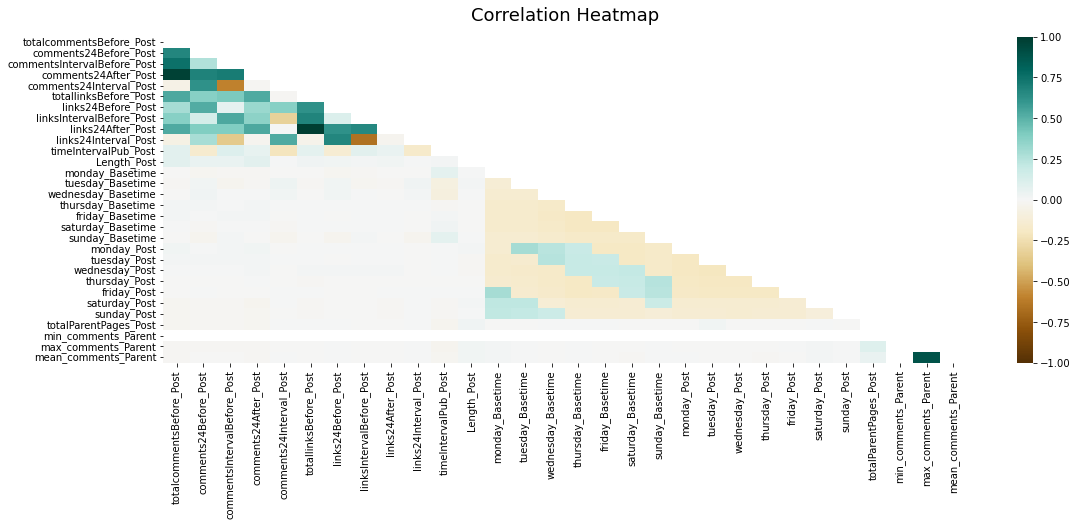

In [17]:
# Test Correlation Heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 6))

mask = np.triu(np.ones_like(X_without_BOW.corr(), dtype=np.bool))
heatmap = sns.heatmap(X_without_BOW.corr(), mask=mask, vmin=-1, vmax=1, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

In [18]:
dropz = ['monday_Basetime', 'tuesday_Basetime', 'wednesday_Basetime',
       'thursday_Basetime', 'friday_Basetime', 'saturday_Basetime',
       'sunday_Basetime', 'monday_Post', 'tuesday_Post', 'wednesday_Post',
       'thursday_Post', 'friday_Post', 'saturday_Post', 'sunday_Post',
       'totalParentPages_Post', 'min_comments_Parent', 'max_comments_Parent',
       'mean_comments_Parent']
comments_links = X_without_BOW.drop(columns=dropz)

# Pairplot: checking for correlation

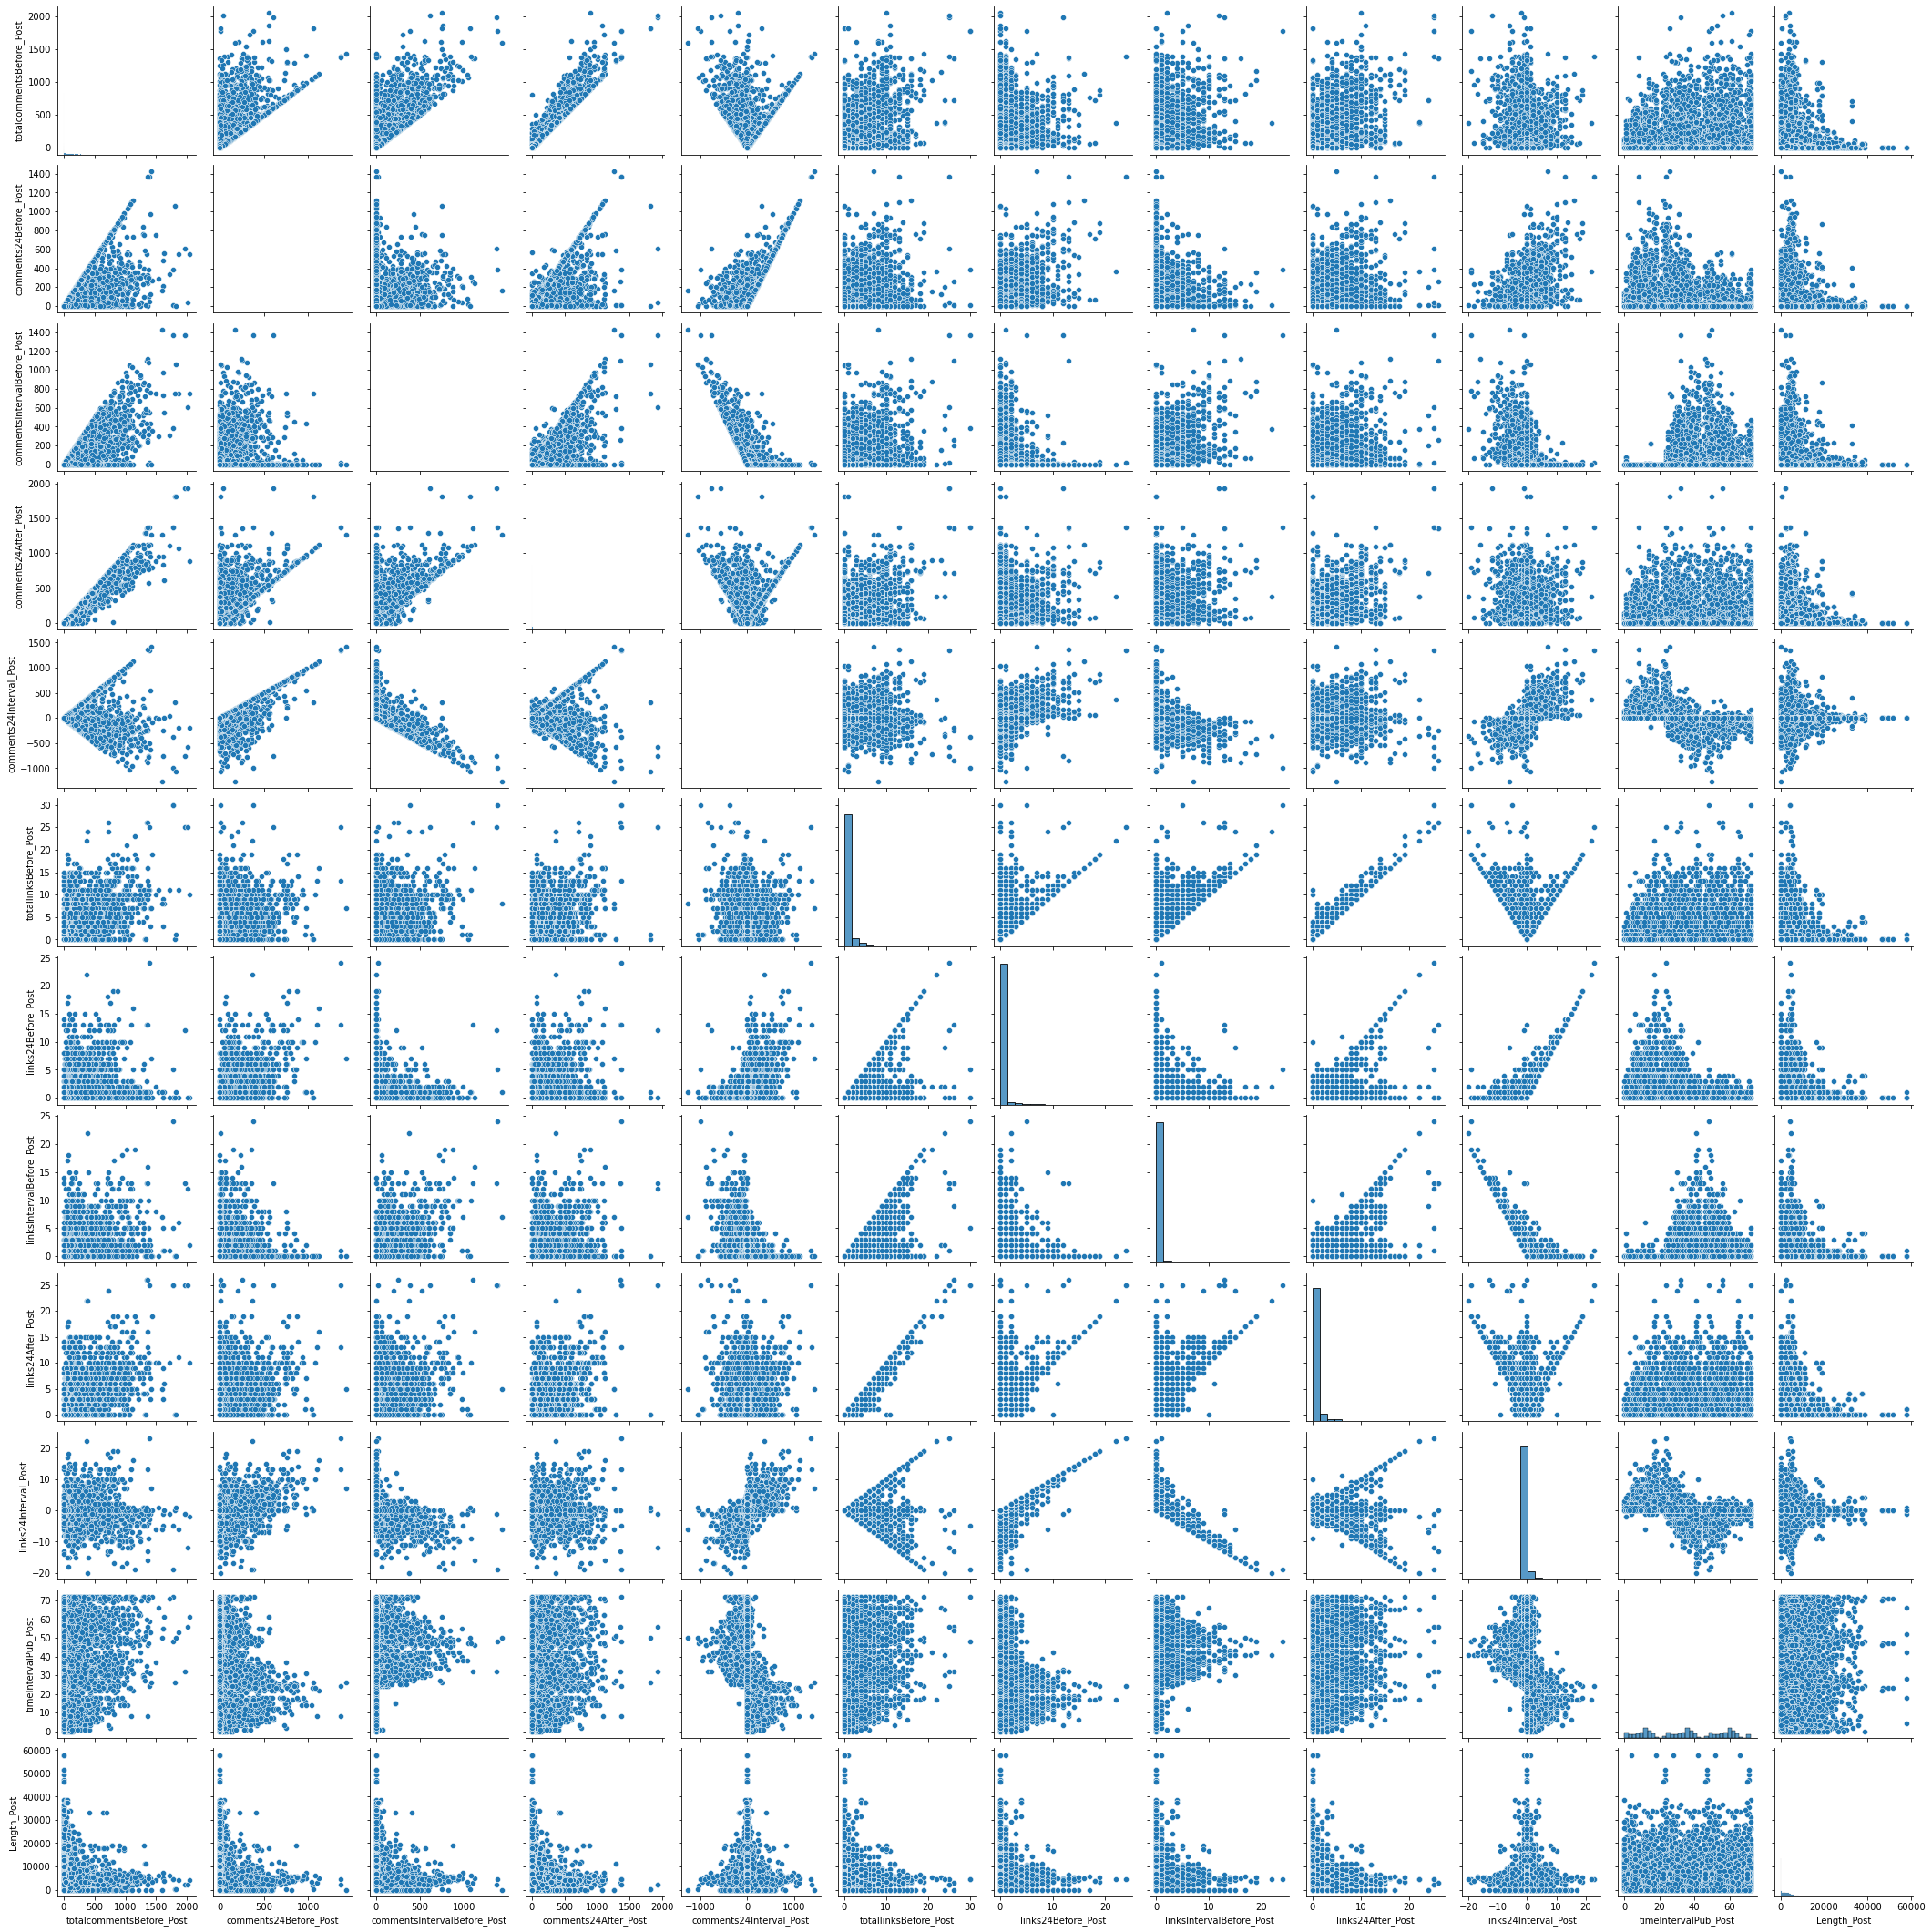

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(comments_links)

# Base models:
#### We are running a few models here with default settings so that we can get an idea of what the variance scores are like out of the box.

## (1) Linear Regression

In [20]:
base_lm = LinearRegression()
base_lm.fit(X_train, y_train)
base_lmPred = base_lm.predict(X_test)

base_lm_rss = np.mean((base_lm.predict(X_test) - y_test) ** 2)
base_lm_variance_score = base_lm.score(X_test, y_test)
base_lm_rmse = np.sqrt(metrics.mean_squared_error(y_test, base_lmPred))

print("Residual sum of squares: %.2f" % base_lm_rss)
print('Variance score: %.2f' % base_lm_variance_score)
print('Root-mean squared error: %.2f' % base_lm_rmse)

Residual sum of squares: 667.27
Variance score: 0.28
Root-mean squared error: 25.83


## (2) KNN Regression

In [21]:
# Find the best n_neighbors value to input into KNN model
# ***** THIS TAKES AROUND 30 MIN ******

# Load pipeline and gridsearch

from sklearn.pipeline import Pipeline 
from sklearn.model_selection import GridSearchCV

# Create a pipeline to combine GridSearch operation & KNN Regression model
#knn_pipe = Pipeline([('knn', KNeighborsRegressor())])

# Set the parameters needed for the grid search
#params = [{'knn__n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
#         'knn__weights': ['uniform', 'distance']
#         }]

# Create the Grid Search with cross validation
#gs_knn = GridSearchCV(knn_pipe,
#                      param_grid=params,
#                      scoring='r2',
#                      cv=5)

# Fit the grid search on our data
#gs_knn.fit(X_train, y_train)
#print('The best parameters for running the Knn model are:\n')
#gs_knn.best_params_

In [22]:
# Run the base KNN model with the best parameters

base_KNN = KNeighborsRegressor(n_neighbors=15, weights='uniform') 
base_KNN.fit(X_train, y_train)
base_KNN_pred = base_KNN.predict(X_test)

base_knn_sum_of_squares = np.mean((base_KNN.predict(X_test) - y_test) ** 2)
base_knn_variance_score = base_KNN.score(X_test, y_test)
base_knn_rmse = np.sqrt(metrics.mean_squared_error(y_test, base_KNN_pred))

print("Residual sum of squares: %.2f" % base_knn_sum_of_squares)
print('Variance score: %.2f' % base_knn_variance_score)
print('Root-mean squared error: %.2f' % base_knn_rmse)

Residual sum of squares: 676.66
Variance score: 0.27
Root-mean squared error: 26.01


## (3) Support Vector

In [23]:
#sv = SVR(kernel = 'linear', C=1)
#sv.fit(X_train, y_train)
#SVR_pred = sv.predict(X_test)

#print("Residual sum of squares: %.2f"
#      % np.mean((sv.predict(X_test) - y_test) ** 2))
#print('Variance score: %.2f' % sv.score(X_test, y_test))
#print('Root-mean squared error: %.2f' % np.sqrt(metrics.mean_squared_error(y_test, SVR_pred)))

## (4) Decision Tree

In [24]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

base_dt_reg = DecisionTreeRegressor()
base_dt_reg.fit(X_train, y_train)
base_dt_reg_pred = base_dt_reg.predict(X_test)

base_dt_sum_of_squares = np.mean((base_dt_reg.predict(X_test) - y_test) ** 2)
base_dt_variance_score = base_dt_reg.score(X_test, y_test)
base_dt_rmse = np.sqrt(metrics.mean_squared_error(y_test, base_dt_reg_pred))

print("Residual sum of squares: %.2f" % base_dt_sum_of_squares)
print('Variance score: %.2f' % base_dt_variance_score)
print('Root-mean squared error: %.2f' % base_dt_rmse)

Residual sum of squares: 1017.68
Variance score: -0.09
Root-mean squared error: 31.90


## (4) Random Forest

In [25]:
from sklearn.ensemble import RandomForestRegressor

base_rf_reg = RandomForestRegressor() 
base_rf_reg.fit(X_train, y_train)
base_rf_reg_pred = base_rf_reg.predict(X_test)

base_rf_sum_of_squares = np.mean((base_rf_reg.predict(X_test) - y_test) ** 2)
base_rf_variance_score = base_rf_reg.score(X_test, y_test)
base_rf_rmse = np.sqrt(metrics.mean_squared_error(y_test, base_rf_reg_pred))

print("Residual sum of squares: %.2f" % base_rf_sum_of_squares)
print('Variance score: %.2f' % base_rf_variance_score)
print('Root-mean squared error: %.2f' % base_rf_rmse)

Residual sum of squares: 562.95
Variance score: 0.39
Root-mean squared error: 23.73


## (5) Gradient Boosting 

In [26]:
from sklearn.ensemble import GradientBoostingRegressor

base_gb = GradientBoostingRegressor()

base_gb.fit(X_train, y_train)
base_gb_pred = base_gb.predict(X_test)


base_gb_sum_of_squares = np.mean((base_gb.predict(X_test) - y_test) ** 2)
base_gb_variance_score = base_gb.score(X_test, y_test)
base_gb_rmse = np.sqrt(metrics.mean_squared_error(y_test, base_gb_pred))

print("Residual sum of squares: %.2f" % base_gb_sum_of_squares)
print('Variance score: %.2f' % base_gb_variance_score)
print('Root-mean squared error: %.2f' % base_gb_rmse)

Residual sum of squares: 562.69
Variance score: 0.40
Root-mean squared error: 23.72


## (6) XG Boost

In [31]:
! pip install xgboost

     |████████████████████████████████| 1.7 MB 2.3 MB/s eta 0:00:01


In [32]:
from xgboost import XGBRegressor

base_xgb = XGBRegressor()

base_xgb.fit(X_train, y_train)
base_xgb_pred = base_xgb.predict(X_test)

base_xgb_sum_of_squares = np.mean((base_xgb.predict(X_test) - y_test) ** 2)
base_xgb_variance_score = base_xgb.score(X_test, y_test)
base_xgb_rmse = np.sqrt(metrics.mean_squared_error(y_test, base_xgb_pred))

print("Residual sum of squares: %.2f" % base_xgb_sum_of_squares)
print('Variance score: %.2f' % base_xgb_variance_score)
print('Root-mean squared error: %.2f' % base_xgb_rmse)

Residual sum of squares: 586.17
Variance score: 0.37
Root-mean squared error: 24.21


# Section 2:
#### We are going to try and modify the base models & data to see if we can get better model performance. The following are the steps we will take. At the end of each step we will run the models and measure model performance.

### **Steps:**
### 1) Data cleaning (Outlier cleanup, missing values)
### 2) Check for multicollinearity
### 3) Standardize all the variables
### 4) Use PCA on some features (200 Bag of words)

# **STEP 1: Data Clean up**

##### **Missing value check**

In [33]:
# Check for missing values on both:
#### (1) train_blog_data
#### (2) test_blog_data

train_na_value_check = train_blog_data.isna().sum()
test_na_value_check = test_blog_data.isna().sum()

with pd.option_context('display.max_rows', 300):
  display(train_na_value_check)

with pd.option_context('display.max_rows', 300):
  display(test_na_value_check)

totalcommentsBefore_Post       0
comments24Before_Post          0
commentsIntervalBefore_Post    0
comments24After_Post           0
comments24Interval_Post        0
totallinksBefore_Post          0
links24Before_Post             0
linksIntervalBefore_Post       0
links24After_Post              0
links24Interval_Post           0
timeIntervalPub_Post           0
Length_Post                    0
1_bag0fWords_Post              0
2_bag0fWords_Post              0
3_bag0fWords_Post              0
4_bag0fWords_Post              0
5_bag0fWords_Post              0
6_bagOfWords_Post              0
7_bagOfWords_Post              0
8_bagOfWords_Post              0
9_bagOfWords_Post              0
10_bagOfWords_Post             0
11_bagOfWords_Post             0
12_bagOfWords_Post             0
13_bagOfWords_Post             0
14_bagOfWords_Post             0
15_bagOfWords_Post             0
16_bagOfWords_Post             0
17_bagOfWords_Post             0
18_bagOfWords_Post             0
19_bagOfWo

totalcommentsBefore_Post       0
comments24Before_Post          0
commentsIntervalBefore_Post    0
comments24After_Post           0
comments24Interval_Post        0
totallinksBefore_Post          0
links24Before_Post             0
linksIntervalBefore_Post       0
links24After_Post              0
links24Interval_Post           0
timeIntervalPub_Post           0
Length_Post                    0
1_bag0fWords_Post              0
2_bag0fWords_Post              0
3_bag0fWords_Post              0
4_bag0fWords_Post              0
5_bag0fWords_Post              0
6_bagOfWords_Post              0
7_bagOfWords_Post              0
8_bagOfWords_Post              0
9_bagOfWords_Post              0
10_bagOfWords_Post             0
11_bagOfWords_Post             0
12_bagOfWords_Post             0
13_bagOfWords_Post             0
14_bagOfWords_Post             0
15_bagOfWords_Post             0
16_bagOfWords_Post             0
17_bagOfWords_Post             0
18_bagOfWords_Post             0
19_bagOfWo

##### **Outlier detection**

In [34]:
# Checking for outliers in the training set

# Find outliers using Z-scores
from scipy import stats

# filter outliers on X_matrix
# Any value with a z-score above 3 will be filtered out:
X_train[(np.abs(stats.zscore(X_train)) < 3).all(axis=1)]

,totalcommentsBefore_Post,comments24Before_Post,commentsIntervalBefore_Post,comments24After_Post,comments24Interval_Post,totallinksBefore_Post,links24Before_Post,linksIntervalBefore_Post,links24After_Post,links24Interval_Post,...,tuesday_Post,wednesday_Post,thursday_Post,friday_Post,saturday_Post,sunday_Post,totalParentPages_Post,min_comments_Parent,max_comments_Parent,mean_comments_Parent


In [35]:
# Checking for outliers in the testing set
X_test[(np.abs(stats.zscore(X_test)) < 3).all(axis=1)]

,totalcommentsBefore_Post,comments24Before_Post,commentsIntervalBefore_Post,comments24After_Post,comments24Interval_Post,totallinksBefore_Post,links24Before_Post,linksIntervalBefore_Post,links24After_Post,links24Interval_Post,...,tuesday_Post,wednesday_Post,thursday_Post,friday_Post,saturday_Post,sunday_Post,totalParentPages_Post,min_comments_Parent,max_comments_Parent,mean_comments_Parent


##### **Scale/Standardize**

In [36]:
# Standardize the variables
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Scaling options: (going with minmax scaler)
scaler = StandardScaler()
minmax = MinMaxScaler()

# Only use the following columns to scale. Removed Bag_of_word Columns (not sure if we need to scale them)
x_col_headers = ["mean_totalcommentsBefore_Source", "std_totalcommentsBefore_Source", "min_totalcommentsBefore_Source", "max_totalcommentsBefore_Source", 
                 "median_totalcommentsBefore_Source", "mean_comments24Before_Source", "std_comments24Before_Source", "min_comments24Before_Source", 
                 "max_comments24Before_Source", "median_comments24Before_Source", 
               "mean_commentsIntervalBefore_Source", "std_commentsIntervalBefore_Source", "min_commentsIntervalBefore_Source", 
               "max_commentsIntervalBefore_Source", "median_commentsIntervalBefore_Source", "mean_comments24After_Source", "std_comments24After_Source", 
               "min_comments24After_Source", "max_comments24After_Source", "median_comments24After_Source",
               "mean_comments24Interval_Source", "std_comments24Interval_Source", "min_comments24Interval_Source", "max_comments24Interval_Source", 
               "median_comments24Interval_Source", "mean_totallinksBefore_Source", "std_totallinksBefore_Source", "min_totallinksBefore_Source", 
               "max_totallinksBefore_Source", "median_totallinksBefore_Source", "mean_links24Before_Source", 
               "std_links24Before_Source", "min_links24Before_Source", "max_links24Before_Source", "median_links24Before_Source", 
               "mean_linksIntervalBefore_Source", "std_linksIntervalBefore_Source", "min_linksIntervalBefore_Source", "max_linksIntervalBefore_Source", 
               "median_linksIntervalBefore_Source", "mean_links24After_Source", "std_links24After_Source", 
               "min_links24After_Source", "max_links24After_Source", "median_links24After_Source","mean_links24Interval_Source", 
               "std_links24Interval_Source", "min_links24Interval_Source", "max_links24Interval_Source", "median_link24Interval_Source", 
               "totalcommentsBefore_Post", "comments24Before_Post", "commentsIntervalBefore_Post", "comments24After_Post",
               "comments24Interval_Post","totallinksBefore_Post", "links24Before_Post", "linksIntervalBefore_Post", "links24After_Post", 
               "links24Interval_Post", "timeIntervalPub_Post", "Length_Post",
               "monday_Basetime", "tuesday_Basetime", "wednesday_Basetime", "thursday_Basetime", "friday_Basetime", "saturday_Basetime", 
               "sunday_Basetime", "monday_Post", "tuesday_Post", "wednesday_Post", "thursday_Post", "friday_Post", "saturday_Post", "sunday_Post", 
               "totalParentPages_Post","min_comments_Parent", "max_comments_Parent", "mean_comments_Parent"]

x_col_headers2 = [ "totalcommentsBefore_Post", "comments24Before_Post", "commentsIntervalBefore_Post", "comments24After_Post",
                  "comments24Interval_Post","totallinksBefore_Post", "links24Before_Post", "linksIntervalBefore_Post", "links24After_Post", 
                  "links24Interval_Post", "timeIntervalPub_Post", "Length_Post",
                  "monday_Basetime", "tuesday_Basetime", "wednesday_Basetime", "thursday_Basetime", "friday_Basetime", "saturday_Basetime", 
                  "sunday_Basetime", "monday_Post", "tuesday_Post", "wednesday_Post", "thursday_Post", "friday_Post", "saturday_Post", "sunday_Post", 
                  "totalParentPages_Post","min_comments_Parent", "max_comments_Parent", "mean_comments_Parent"]

# incase we need to add bow_cols back....here they are
bow_colnames = ["1_bag0fWords_Post", "2_bag0fWords_Post", "3_bag0fWords_Post", "4_bag0fWords_Post", "5_bag0fWords_Post", "6_bagOfWords_Post",
               "7_bagOfWords_Post",'8_bagOfWords_Post',
               '9_bagOfWords_Post','10_bagOfWords_Post','11_bagOfWords_Post','12_bagOfWords_Post','13_bagOfWords_Post','14_bagOfWords_Post',
               '15_bagOfWords_Post','16_bagOfWords_Post','17_bagOfWords_Post','18_bagOfWords_Post','19_bagOfWords_Post','20_bagOfWords_Post',
               '21_bagOfWords_Post','22_bagOfWords_Post','23_bagOfWords_Post','24_bagOfWords_Post',
               '25_bagOfWords_Post','26_bagOfWords_Post','27_bagOfWords_Post','28_bagOfWords_Post','29_bagOfWords_Post','30_bagOfWords_Post',
               '31_bagOfWords_Post','32_bagOfWords_Post','33_bagOfWords_Post','34_bagOfWords_Post','35_bagOfWords_Post','36_bagOfWords_Post',
               '37_bagOfWords_Post','38_bagOfWords_Post','39_bagOfWords_Post','40_bagOfWords_Post',
               '41_bagOfWords_Post','42_bagOfWords_Post','43_bagOfWords_Post','44_bagOfWords_Post','45_bagOfWords_Post','46_bagOfWords_Post',
               '47_bagOfWords_Post','48_bagOfWords_Post','49_bagOfWords_Post','50_bagOfWords_Post','51_bagOfWords_Post','52_bagOfWords_Post',
               '53_bagOfWords_Post','54_bagOfWords_Post','55_bagOfWords_Post','56_bagOfWords_Post',
               '57_bagOfWords_Post','58_bagOfWords_Post','59_bagOfWords_Post','60_bagOfWords_Post','61_bagOfWords_Post','62_bagOfWords_Post',
               '63_bagOfWords_Post','64_bagOfWords_Post','65_bagOfWords_Post','66_bagOfWords_Post','67_bagOfWords_Post','68_bagOfWords_Post',
               '69_bagOfWords_Post','70_bagOfWords_Post','71_bagOfWords_Post','72_bagOfWords_Post',
               '73_bagOfWords_Post','74_bagOfWords_Post','75_bagOfWords_Post','76_bagOfWords_Post','77_bagOfWords_Post','78_bagOfWords_Post',
               '79_bagOfWords_Post','80_bagOfWords_Post','81_bagOfWords_Post','82_bagOfWords_Post','83_bagOfWords_Post','84_bagOfWords_Post',
               '85_bagOfWords_Post','86_bagOfWords_Post','87_bagOfWords_Post','88_bagOfWords_Post',
               '89_bagOfWords_Post','90_bagOfWords_Post','91_bagOfWords_Post','92_bagOfWords_Post','93_bagOfWords_Post','94_bagOfWords_Post',
               '95_bagOfWords_Post','96_bagOfWords_Post','97_bagOfWords_Post','98_bagOfWords_Post','99_bagOfWords_Post','100_bagOfWords_Post',
               '101_bagOfWords_Post','102_bagOfWords_Post','103_bagOfWords_Post','104_bagOfWords_Post',
               '105_bagOfWords_Post','106_bagOfWords_Post','107_bagOfWords_Post','108_bagOfWords_Post','109_bagOfWords_Post','110_bagOfWords_Post',
               '111_bagOfWords_Post','112_bagOfWords_Post','113_bagOfWords_Post','114_bagOfWords_Post','115_bagOfWords_Post','116_bagOfWords_Post',
               '117_bagOfWords_Post','118_bagOfWords_Post','119_bagOfWords_Post','120_bagOfWords_Post',
               '121_bagOfWords_Post','122_bagOfWords_Post','123_bagOfWords_Post','124_bagOfWords_Post','125_bagOfWords_Post','126_bagOfWords_Post',
               '127_bagOfWords_Post','128_bagOfWords_Post','129_bagOfWords_Post','130_bagOfWords_Post','131_bagOfWords_Post','132_bagOfWords_Post',
               '133_bagOfWords_Post','134_bagOfWords_Post','135_bagOfWords_Post','136_bagOfWords_Post',
               '137_bagOfWords_Post','138_bagOfWords_Post','139_bagOfWords_Post','140_bagOfWords_Post','141_bagOfWords_Post','142_bagOfWords_Post',
               '143_bagOfWords_Post','144_bagOfWords_Post','145_bagOfWords_Post','146_bagOfWords_Post','147_bagOfWords_Post','148_bagOfWords_Post',
               '149_bagOfWords_Post','150_bagOfWords_Post','151_bagOfWords_Post','152_bagOfWords_Post',
               '153_bagOfWords_Post','154_bagOfWords_Post','155_bagOfWords_Post','156_bagOfWords_Post','157_bagOfWords_Post','158_bagOfWords_Post',
               '159_bagOfWords_Post','160_bagOfWords_Post','161_bagOfWords_Post','162_bagOfWords_Post','163_bagOfWords_Post','164_bagOfWords_Post',
               '165_bagOfWords_Post','166_bagOfWords_Post','167_bagOfWords_Post','168_bagOfWords_Post',
               '169_bagOfWords_Post','170_bagOfWords_Post','171_bagOfWords_Post','172_bagOfWords_Post','173_bagOfWords_Post','174_bagOfWords_Post',
               '175_bagOfWords_Post','176_bagOfWords_Post','177_bagOfWords_Post','178_bagOfWords_Post','179_bagOfWords_Post','180_bagOfWords_Post',
               '181_bagOfWords_Post','182_bagOfWords_Post','183_bagOfWords_Post','184_bagOfWords_Post',
               '185_bagOfWords_Post','186_bagOfWords_Post','187_bagOfWords_Post','188_bagOfWords_Post','189_bagOfWords_Post','190_bagOfWords_Post',
               '191_bagOfWords_Post','192_bagOfWords_Post','193_bagOfWords_Post','194_bagOfWords_Post','195_bagOfWords_Post','196_bagOfWords_Post',
               '197_bagOfWords_Post','198_bagOfWords_Post','199_bagOfWords_Post','200_bagOfWords_Post']


# Create a X_train_scaled dataset
X_train_scaled = X_train
y_train_scaled = y_train

# Create a X_train_scaled dataset
X_test_scaled = X_test
y_test_scaled = y_test

# STANDARD SCALING
# Fit Transform training data using MinMax Scaler
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_scaled), columns=colnames)


# Using the fit values from training, we can now Transform the testing data *** DO NOT APPLY fit_tranform, only TRANSFORM
X_test_scaled = pd.DataFrame(scaler.transform(X_test_scaled), columns=colnames)



In [37]:
# Check to see what the scaled df looks like
X_train_scaled.head()

,totalcommentsBefore_Post,comments24Before_Post,commentsIntervalBefore_Post,comments24After_Post,comments24Interval_Post,totallinksBefore_Post,links24Before_Post,linksIntervalBefore_Post,links24After_Post,links24Interval_Post,...,tuesday_Post,wednesday_Post,thursday_Post,friday_Post,saturday_Post,sunday_Post,totalParentPages_Post,min_comments_Parent,max_comments_Parent,mean_comments_Parent
0,-0.337079,-0.229670,-0.249138,-0.346756,0.012103,-0.320777,-0.21839,-0.206545,-0.310545,-0.010048,...,-0.448846,-0.454696,2.272362,-0.427399,-0.326158,-0.312402,-0.08286,0.0,-0.045171,-0.037836
1,-0.301070,-0.229670,-0.178225,-0.315136,-0.045635,-0.320777,-0.21839,-0.206545,-0.310545,-0.010048,...,-0.448846,2.199274,-0.440071,-0.427399,-0.326158,-0.312402,-0.08286,0.0,-0.045171,-0.037836
2,-0.301070,-0.229670,-0.178225,-0.315136,-0.045635,-0.320777,-0.21839,-0.206545,-0.310545,-0.010048,...,-0.448846,2.199274,-0.440071,-0.427399,-0.326158,-0.312402,-0.08286,0.0,-0.045171,-0.037836
3,-0.337079,-0.229670,-0.249138,-0.346756,0.012103,-0.320777,-0.21839,-0.206545,-0.310545,-0.010048,...,-0.448846,-0.454696,2.272362,-0.427399,-0.326158,-0.312402,-0.08286,0.0,-0.045171,-0.037836
4,-0.328076,-0.247051,-0.213681,-0.346756,-0.031200,-0.320777,-0.21839,-0.206545,-0.310545,-0.010048,...,-0.448846,-0.454696,2.272362,-0.427399,-0.326158,-0.312402,-0.08286,0.0,-0.045171,-0.037836


In [38]:
# Check to see what the scaled df looks like
X_test_scaled.head()

,totalcommentsBefore_Post,comments24Before_Post,commentsIntervalBefore_Post,comments24After_Post,comments24Interval_Post,totallinksBefore_Post,links24Before_Post,linksIntervalBefore_Post,links24After_Post,links24Interval_Post,...,tuesday_Post,wednesday_Post,thursday_Post,friday_Post,saturday_Post,sunday_Post,totalParentPages_Post,min_comments_Parent,max_comments_Parent,mean_comments_Parent
0,-0.355083,-0.264431,-0.249138,-0.367836,-0.016766,-0.320777,-0.21839,-0.206545,-0.310545,-0.010048,...,-0.448846,-0.454696,-0.440071,-0.427399,3.066000,-0.312402,-0.08286,0.0,-0.045171,-0.037836
1,0.563138,1.317153,-0.054127,0.696723,1.137999,0.958889,2.06109,-0.206545,1.047970,1.704903,...,-0.448846,-0.454696,-0.440071,-0.427399,-0.326158,3.201001,-0.08286,0.0,-0.045171,-0.037836
2,-0.355083,-0.264431,-0.249138,-0.367836,-0.016766,-0.320777,-0.21839,-0.206545,-0.310545,-0.010048,...,-0.448846,-0.454696,-0.440071,-0.427399,-0.326158,-0.312402,-0.08286,0.0,-0.045171,-0.037836
3,-0.355083,-0.264431,-0.249138,-0.367836,-0.016766,-0.320777,-0.21839,-0.206545,-0.310545,-0.010048,...,-0.448846,-0.454696,-0.440071,-0.427399,3.066000,-0.312402,-0.08286,0.0,-0.045171,-0.037836
4,-0.310072,-0.177530,-0.249138,-0.315136,0.055407,-0.320777,-0.21839,-0.206545,-0.310545,-0.010048,...,-0.448846,-0.454696,-0.440071,-0.427399,-0.326158,-0.312402,-0.08286,0.0,-0.045171,-0.037836


# Runing base models again to see if there is a change in accuracy after **scaling**

### **Linear model (using scaled data)**

In [39]:
# Linear Regression
scaled_lm = LinearRegression()
scaled_lm.fit(X_train_scaled, y_train)
scaled_lmPred = scaled_lm.predict(X_test_scaled)

scaled_lm_sum_of_squares = np.mean((scaled_lm.predict(X_test_scaled) - y_test) ** 2)
scaled_lm_variance_score = scaled_lm.score(X_test_scaled, y_test)
scaled_lm_rmse = np.sqrt(metrics.mean_squared_error(y_test, scaled_lmPred))

print('Initial Results:')
print('Residual sum of squares: ', base_lm_rss)
print('Variance score: ', base_lm_variance_score)
print('Root-mean squared error: ', base_lm_rmse)

print('\n')

print('After Scaling Results:')
print("Residual sum of squares: %.2f" % scaled_lm_sum_of_squares)
print('Variance score: %.2f' % scaled_lm_variance_score)
print('Root-mean squared error: %.2f' % scaled_lm_rmse)

Initial Results:
Residual sum of squares:  667.2689170236517
Variance score:  0.2826941744576913
Root-mean squared error:  25.831548870008803


After Scaling Results:
Residual sum of squares: 666.45
Variance score: 0.28
Root-mean squared error: 25.82


### **KNN model (using scaled data)**

In [40]:
# KNN Regression
scaled_KNN = KNeighborsRegressor(n_neighbors=15, weights='uniform') 
scaled_KNN.fit(X_train_scaled, y_train)
scaled_KNN_pred = scaled_KNN.predict(X_test_scaled)

scaled_knn_sum_of_squares = np.mean((scaled_KNN.predict(X_test_scaled) - y_test) ** 2)
scaled_knn_variance_score = scaled_KNN.score(X_test_scaled, y_test)
scaled_knn_rmse = np.sqrt(metrics.mean_squared_error(y_test, scaled_KNN_pred))

print('Initial Results:')
print('Residual sum of squares: ', base_knn_sum_of_squares)
print('Variance score: ', base_knn_variance_score)
print('Root-mean squared error: ', base_knn_rmse)

print('\n')

print('After Scaling Results:')
print("Residual sum of squares: %.2f" % scaled_knn_sum_of_squares)
print('Variance score: %.2f' % scaled_knn_variance_score)
print('Root-mean squared error: %.2f' % scaled_knn_rmse)

Initial Results:
Residual sum of squares:  676.6603800862879
Variance score:  0.2725984679242084
Root-mean squared error:  26.012696517014096


After Scaling Results:
Residual sum of squares: 765.01
Variance score: 0.18
Root-mean squared error: 27.66


### **Decision Tree model (using scaled data)**

In [41]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

scaled_dt_reg = DecisionTreeRegressor() 
scaled_dt_reg.fit(X_train_scaled, y_train)
scaled_dt_reg_pred = scaled_dt_reg.predict(X_test_scaled)

scaled_dt_sum_of_squares = np.mean((scaled_dt_reg.predict(X_test_scaled) - y_test) ** 2)
scaled_dt_variance_score = scaled_dt_reg.score(X_test_scaled, y_test)
scaled_dt_rmse = np.sqrt(metrics.mean_squared_error(y_test, scaled_dt_reg_pred))

print('Initial Results:')
print("Residual sum of squares: %.2f" % base_dt_sum_of_squares)
print('Variance score: %.2f' % base_dt_variance_score)
print('Root-mean squared error: %.2f' % base_dt_rmse)

print('\n')

print('After Scaling Results:')
print("Residual sum of squares: %.2f" % scaled_dt_sum_of_squares)
print('Variance score: %.2f' % scaled_dt_variance_score)
print('Root-mean squared error: %.2f' % scaled_dt_rmse)

Initial Results:
Residual sum of squares: 1017.68
Variance score: -0.09
Root-mean squared error: 31.90


After Scaling Results:
Residual sum of squares: 966.67
Variance score: -0.04
Root-mean squared error: 31.09


### **Random Forest model (using scaled data)**

In [42]:
# Random Forest Regressor

scaled_rf_reg = RandomForestRegressor() 
scaled_rf_reg.fit(X_train_scaled, y_train)
scaled_rf_reg_pred = scaled_rf_reg.predict(X_test_scaled)

scaled_rf_sum_of_squares = np.mean((scaled_rf_reg.predict(X_test_scaled) - y_test) ** 2)
scaled_rf_variance_score = scaled_rf_reg.score(X_test_scaled, y_test)
scaled_rf_rmse = np.sqrt(metrics.mean_squared_error(y_test, scaled_rf_reg_pred))

print('Initial Results:')
print("Residual sum of squares: %.2f" % base_rf_sum_of_squares)
print('Variance score: %.2f' % base_rf_variance_score)
print('Root-mean squared error: %.2f' % base_rf_rmse)

print('\n')

print('After Scaling Results:')
print("Residual sum of squares: %.2f" % scaled_rf_sum_of_squares)
print('Variance score: %.2f' % scaled_rf_variance_score)
print('Root-mean squared error: %.2f' % scaled_rf_rmse)

Initial Results:
Residual sum of squares: 562.95
Variance score: 0.39
Root-mean squared error: 23.73


After Scaling Results:
Residual sum of squares: 566.14
Variance score: 0.39
Root-mean squared error: 23.79


### **Gradient Boost model (using scaled data)**

In [43]:
# Gradient Boost

scaled_gb = GradientBoostingRegressor()

scaled_gb.fit(X_train_scaled, y_train)
scaled_gb_pred = scaled_gb.predict(X_test_scaled)

scaled_gb_sum_of_squares = np.mean((scaled_gb.predict(X_test_scaled) - y_test) ** 2)
scaled_gb_variance_score = scaled_gb.score(X_test_scaled, y_test)
scaled_gb_rmse = np.sqrt(metrics.mean_squared_error(y_test, scaled_gb_pred))

print('Initial Results:')
print("Residual sum of squares: %.2f" % base_gb_sum_of_squares)
print('Variance score: %.2f' % base_gb_variance_score)
print('Root-mean squared error: %.2f' % base_gb_rmse)

print('\n')

print('After Scaling Results:')
print("Residual sum of squares: %.2f" % scaled_gb_sum_of_squares)
print('Variance score: %.2f' % scaled_gb_variance_score)
print('Root-mean squared error: %.2f' % scaled_gb_rmse)

Initial Results:
Residual sum of squares: 562.69
Variance score: 0.40
Root-mean squared error: 23.72


After Scaling Results:
Residual sum of squares: 570.41
Variance score: 0.39
Root-mean squared error: 23.88


### **XG Boost model (using scaled data)**

In [44]:
# XGBoost

scaled_xgb = XGBRegressor()

scaled_xgb.fit(X_train_scaled, y_train)
scaled_xgb_pred = scaled_xgb.predict(X_test_scaled)


scaled_xgb_sum_of_squares = np.mean((scaled_xgb.predict(X_test_scaled) - y_test) ** 2)
scaled_xgb_variance_score = scaled_xgb.score(X_test_scaled, y_test)
scaled_xgb_rmse = np.sqrt(metrics.mean_squared_error(y_test, scaled_xgb_pred))

print('Initial Results:')
print("Residual sum of squares: %.2f" % base_xgb_sum_of_squares)
print('Variance score: %.2f' % base_xgb_variance_score)
print('Root-mean squared error: %.2f' % base_xgb_rmse)

print('\n')

print('After Scaling Results:')
print("Residual sum of squares: %.2f" % scaled_xgb_sum_of_squares)
print('Variance score: %.2f' % scaled_xgb_variance_score)
print('Root-mean squared error: %.2f' % scaled_xgb_rmse)

Initial Results:
Residual sum of squares: 586.17
Variance score: 0.37
Root-mean squared error: 24.21


After Scaling Results:
Residual sum of squares: 589.94
Variance score: 0.37
Root-mean squared error: 24.29


# Technique 2: to help improve model performance

## Dimension Reduction

In [45]:
# List of columns that we want to perform PCA on:

train_bow_matrix = X_train[["1_bag0fWords_Post", "2_bag0fWords_Post", "3_bag0fWords_Post", "4_bag0fWords_Post", 
                            "5_bag0fWords_Post", "6_bagOfWords_Post","7_bagOfWords_Post",'8_bagOfWords_Post',
                            '9_bagOfWords_Post','10_bagOfWords_Post','11_bagOfWords_Post','12_bagOfWords_Post',
                            '13_bagOfWords_Post','14_bagOfWords_Post','15_bagOfWords_Post','16_bagOfWords_Post',
                            '17_bagOfWords_Post','18_bagOfWords_Post','19_bagOfWords_Post','20_bagOfWords_Post',
                            '21_bagOfWords_Post','22_bagOfWords_Post','23_bagOfWords_Post','24_bagOfWords_Post',
                            '25_bagOfWords_Post','26_bagOfWords_Post','27_bagOfWords_Post','28_bagOfWords_Post',
                            '29_bagOfWords_Post','30_bagOfWords_Post','31_bagOfWords_Post','32_bagOfWords_Post',
                            '33_bagOfWords_Post','34_bagOfWords_Post','35_bagOfWords_Post','36_bagOfWords_Post',
                            '37_bagOfWords_Post','38_bagOfWords_Post','39_bagOfWords_Post','40_bagOfWords_Post',
                            '41_bagOfWords_Post','42_bagOfWords_Post','43_bagOfWords_Post','44_bagOfWords_Post',
                            '45_bagOfWords_Post','46_bagOfWords_Post','47_bagOfWords_Post','48_bagOfWords_Post',
                            '49_bagOfWords_Post','50_bagOfWords_Post','51_bagOfWords_Post','52_bagOfWords_Post',
                            '53_bagOfWords_Post','54_bagOfWords_Post','55_bagOfWords_Post','56_bagOfWords_Post',
                            '57_bagOfWords_Post','58_bagOfWords_Post','59_bagOfWords_Post','60_bagOfWords_Post',
                            '61_bagOfWords_Post','62_bagOfWords_Post','63_bagOfWords_Post','64_bagOfWords_Post',
                            '65_bagOfWords_Post','66_bagOfWords_Post','67_bagOfWords_Post','68_bagOfWords_Post',
                            '69_bagOfWords_Post','70_bagOfWords_Post','71_bagOfWords_Post','72_bagOfWords_Post',
                            '73_bagOfWords_Post','74_bagOfWords_Post','75_bagOfWords_Post','76_bagOfWords_Post',
                            '77_bagOfWords_Post','78_bagOfWords_Post','79_bagOfWords_Post','80_bagOfWords_Post',
                            '81_bagOfWords_Post','82_bagOfWords_Post','83_bagOfWords_Post','84_bagOfWords_Post',
                            '85_bagOfWords_Post','86_bagOfWords_Post','87_bagOfWords_Post','88_bagOfWords_Post',
                            '89_bagOfWords_Post','90_bagOfWords_Post','91_bagOfWords_Post','92_bagOfWords_Post',
                            '93_bagOfWords_Post','94_bagOfWords_Post','95_bagOfWords_Post','96_bagOfWords_Post',
                            '97_bagOfWords_Post','98_bagOfWords_Post','99_bagOfWords_Post','100_bagOfWords_Post',
                            '101_bagOfWords_Post','102_bagOfWords_Post','103_bagOfWords_Post','104_bagOfWords_Post',
                            '105_bagOfWords_Post','106_bagOfWords_Post','107_bagOfWords_Post','108_bagOfWords_Post',
                            '109_bagOfWords_Post','110_bagOfWords_Post','111_bagOfWords_Post','112_bagOfWords_Post',
                            '113_bagOfWords_Post','114_bagOfWords_Post','115_bagOfWords_Post','116_bagOfWords_Post',
                            '117_bagOfWords_Post','118_bagOfWords_Post','119_bagOfWords_Post','120_bagOfWords_Post',
                            '121_bagOfWords_Post','122_bagOfWords_Post','123_bagOfWords_Post','124_bagOfWords_Post',
                            '125_bagOfWords_Post','126_bagOfWords_Post','127_bagOfWords_Post','128_bagOfWords_Post',
                            '129_bagOfWords_Post','130_bagOfWords_Post','131_bagOfWords_Post','132_bagOfWords_Post',
                            '133_bagOfWords_Post','134_bagOfWords_Post','135_bagOfWords_Post','136_bagOfWords_Post',
                            '137_bagOfWords_Post','138_bagOfWords_Post','139_bagOfWords_Post','140_bagOfWords_Post',
                            '141_bagOfWords_Post','142_bagOfWords_Post','143_bagOfWords_Post','144_bagOfWords_Post',
                            '145_bagOfWords_Post','146_bagOfWords_Post','147_bagOfWords_Post','148_bagOfWords_Post',
                            '149_bagOfWords_Post','150_bagOfWords_Post','151_bagOfWords_Post','152_bagOfWords_Post',
                            '153_bagOfWords_Post','154_bagOfWords_Post','155_bagOfWords_Post','156_bagOfWords_Post',
                            '157_bagOfWords_Post','158_bagOfWords_Post','159_bagOfWords_Post','160_bagOfWords_Post',
                            '161_bagOfWords_Post','162_bagOfWords_Post','163_bagOfWords_Post','164_bagOfWords_Post',
                            '165_bagOfWords_Post','166_bagOfWords_Post','167_bagOfWords_Post','168_bagOfWords_Post',
                            '169_bagOfWords_Post','170_bagOfWords_Post','171_bagOfWords_Post','172_bagOfWords_Post',
                            '173_bagOfWords_Post','174_bagOfWords_Post','175_bagOfWords_Post','176_bagOfWords_Post',
                            '177_bagOfWords_Post','178_bagOfWords_Post','179_bagOfWords_Post','180_bagOfWords_Post',
                            '181_bagOfWords_Post','182_bagOfWords_Post','183_bagOfWords_Post','184_bagOfWords_Post',
                            '185_bagOfWords_Post','186_bagOfWords_Post','187_bagOfWords_Post','188_bagOfWords_Post',
                            '189_bagOfWords_Post','190_bagOfWords_Post','191_bagOfWords_Post','192_bagOfWords_Post',
                            '193_bagOfWords_Post','194_bagOfWords_Post','195_bagOfWords_Post','196_bagOfWords_Post',
                            '197_bagOfWords_Post','198_bagOfWords_Post','199_bagOfWords_Post','200_bagOfWords_Post',]]

In [46]:
test_bow_matrix = X_test[["1_bag0fWords_Post", "2_bag0fWords_Post", "3_bag0fWords_Post", "4_bag0fWords_Post", 
                            "5_bag0fWords_Post", "6_bagOfWords_Post","7_bagOfWords_Post",'8_bagOfWords_Post',
                            '9_bagOfWords_Post','10_bagOfWords_Post','11_bagOfWords_Post','12_bagOfWords_Post',
                            '13_bagOfWords_Post','14_bagOfWords_Post','15_bagOfWords_Post','16_bagOfWords_Post',
                            '17_bagOfWords_Post','18_bagOfWords_Post','19_bagOfWords_Post','20_bagOfWords_Post',
                            '21_bagOfWords_Post','22_bagOfWords_Post','23_bagOfWords_Post','24_bagOfWords_Post',
                            '25_bagOfWords_Post','26_bagOfWords_Post','27_bagOfWords_Post','28_bagOfWords_Post',
                            '29_bagOfWords_Post','30_bagOfWords_Post','31_bagOfWords_Post','32_bagOfWords_Post',
                            '33_bagOfWords_Post','34_bagOfWords_Post','35_bagOfWords_Post','36_bagOfWords_Post',
                            '37_bagOfWords_Post','38_bagOfWords_Post','39_bagOfWords_Post','40_bagOfWords_Post',
                            '41_bagOfWords_Post','42_bagOfWords_Post','43_bagOfWords_Post','44_bagOfWords_Post',
                            '45_bagOfWords_Post','46_bagOfWords_Post','47_bagOfWords_Post','48_bagOfWords_Post',
                            '49_bagOfWords_Post','50_bagOfWords_Post','51_bagOfWords_Post','52_bagOfWords_Post',
                            '53_bagOfWords_Post','54_bagOfWords_Post','55_bagOfWords_Post','56_bagOfWords_Post',
                            '57_bagOfWords_Post','58_bagOfWords_Post','59_bagOfWords_Post','60_bagOfWords_Post',
                            '61_bagOfWords_Post','62_bagOfWords_Post','63_bagOfWords_Post','64_bagOfWords_Post',
                            '65_bagOfWords_Post','66_bagOfWords_Post','67_bagOfWords_Post','68_bagOfWords_Post',
                            '69_bagOfWords_Post','70_bagOfWords_Post','71_bagOfWords_Post','72_bagOfWords_Post',
                            '73_bagOfWords_Post','74_bagOfWords_Post','75_bagOfWords_Post','76_bagOfWords_Post',
                            '77_bagOfWords_Post','78_bagOfWords_Post','79_bagOfWords_Post','80_bagOfWords_Post',
                            '81_bagOfWords_Post','82_bagOfWords_Post','83_bagOfWords_Post','84_bagOfWords_Post',
                            '85_bagOfWords_Post','86_bagOfWords_Post','87_bagOfWords_Post','88_bagOfWords_Post',
                            '89_bagOfWords_Post','90_bagOfWords_Post','91_bagOfWords_Post','92_bagOfWords_Post',
                            '93_bagOfWords_Post','94_bagOfWords_Post','95_bagOfWords_Post','96_bagOfWords_Post',
                            '97_bagOfWords_Post','98_bagOfWords_Post','99_bagOfWords_Post','100_bagOfWords_Post',
                            '101_bagOfWords_Post','102_bagOfWords_Post','103_bagOfWords_Post','104_bagOfWords_Post',
                            '105_bagOfWords_Post','106_bagOfWords_Post','107_bagOfWords_Post','108_bagOfWords_Post',
                            '109_bagOfWords_Post','110_bagOfWords_Post','111_bagOfWords_Post','112_bagOfWords_Post',
                            '113_bagOfWords_Post','114_bagOfWords_Post','115_bagOfWords_Post','116_bagOfWords_Post',
                            '117_bagOfWords_Post','118_bagOfWords_Post','119_bagOfWords_Post','120_bagOfWords_Post',
                            '121_bagOfWords_Post','122_bagOfWords_Post','123_bagOfWords_Post','124_bagOfWords_Post',
                            '125_bagOfWords_Post','126_bagOfWords_Post','127_bagOfWords_Post','128_bagOfWords_Post',
                            '129_bagOfWords_Post','130_bagOfWords_Post','131_bagOfWords_Post','132_bagOfWords_Post',
                            '133_bagOfWords_Post','134_bagOfWords_Post','135_bagOfWords_Post','136_bagOfWords_Post',
                            '137_bagOfWords_Post','138_bagOfWords_Post','139_bagOfWords_Post','140_bagOfWords_Post',
                            '141_bagOfWords_Post','142_bagOfWords_Post','143_bagOfWords_Post','144_bagOfWords_Post',
                            '145_bagOfWords_Post','146_bagOfWords_Post','147_bagOfWords_Post','148_bagOfWords_Post',
                            '149_bagOfWords_Post','150_bagOfWords_Post','151_bagOfWords_Post','152_bagOfWords_Post',
                            '153_bagOfWords_Post','154_bagOfWords_Post','155_bagOfWords_Post','156_bagOfWords_Post',
                            '157_bagOfWords_Post','158_bagOfWords_Post','159_bagOfWords_Post','160_bagOfWords_Post',
                            '161_bagOfWords_Post','162_bagOfWords_Post','163_bagOfWords_Post','164_bagOfWords_Post',
                            '165_bagOfWords_Post','166_bagOfWords_Post','167_bagOfWords_Post','168_bagOfWords_Post',
                            '169_bagOfWords_Post','170_bagOfWords_Post','171_bagOfWords_Post','172_bagOfWords_Post',
                            '173_bagOfWords_Post','174_bagOfWords_Post','175_bagOfWords_Post','176_bagOfWords_Post',
                            '177_bagOfWords_Post','178_bagOfWords_Post','179_bagOfWords_Post','180_bagOfWords_Post',
                            '181_bagOfWords_Post','182_bagOfWords_Post','183_bagOfWords_Post','184_bagOfWords_Post',
                            '185_bagOfWords_Post','186_bagOfWords_Post','187_bagOfWords_Post','188_bagOfWords_Post',
                            '189_bagOfWords_Post','190_bagOfWords_Post','191_bagOfWords_Post','192_bagOfWords_Post',
                            '193_bagOfWords_Post','194_bagOfWords_Post','195_bagOfWords_Post','196_bagOfWords_Post',
                            '197_bagOfWords_Post','198_bagOfWords_Post','199_bagOfWords_Post','200_bagOfWords_Post',]]

In [47]:
from sklearn.decomposition import PCA

pca = PCA(n_components=20)

# Create PCA for train set
train_bow_pca = pd.DataFrame(pca.fit_transform(train_bow_matrix))

# Transform the test set
test_bow_pca = pd.DataFrame(pca.transform(test_bow_matrix))

In [48]:
# Removing all bag_of_word columns from both X_train and X_test and will Replace these columns with PCA representation

bow_cols_to_drop = ["1_bag0fWords_Post", "2_bag0fWords_Post", "3_bag0fWords_Post", "4_bag0fWords_Post", 
                       "5_bag0fWords_Post", "6_bagOfWords_Post","7_bagOfWords_Post",'8_bagOfWords_Post',
                       '9_bagOfWords_Post','10_bagOfWords_Post','11_bagOfWords_Post','12_bagOfWords_Post',
                       '13_bagOfWords_Post','14_bagOfWords_Post','15_bagOfWords_Post','16_bagOfWords_Post',
                       '17_bagOfWords_Post','18_bagOfWords_Post','19_bagOfWords_Post','20_bagOfWords_Post',
                       '21_bagOfWords_Post','22_bagOfWords_Post','23_bagOfWords_Post','24_bagOfWords_Post',
                       '25_bagOfWords_Post','26_bagOfWords_Post','27_bagOfWords_Post','28_bagOfWords_Post',
                       '29_bagOfWords_Post','30_bagOfWords_Post','31_bagOfWords_Post','32_bagOfWords_Post',
                       '33_bagOfWords_Post','34_bagOfWords_Post','35_bagOfWords_Post','36_bagOfWords_Post',
                       '37_bagOfWords_Post','38_bagOfWords_Post','39_bagOfWords_Post','40_bagOfWords_Post',
                       '41_bagOfWords_Post','42_bagOfWords_Post','43_bagOfWords_Post','44_bagOfWords_Post',
                       '45_bagOfWords_Post','46_bagOfWords_Post','47_bagOfWords_Post','48_bagOfWords_Post',
                       '49_bagOfWords_Post','50_bagOfWords_Post','51_bagOfWords_Post','52_bagOfWords_Post',
                       '53_bagOfWords_Post','54_bagOfWords_Post','55_bagOfWords_Post','56_bagOfWords_Post',
                       '57_bagOfWords_Post','58_bagOfWords_Post','59_bagOfWords_Post','60_bagOfWords_Post',
                       '61_bagOfWords_Post','62_bagOfWords_Post','63_bagOfWords_Post','64_bagOfWords_Post',
                       '65_bagOfWords_Post','66_bagOfWords_Post','67_bagOfWords_Post','68_bagOfWords_Post',
                       '69_bagOfWords_Post','70_bagOfWords_Post','71_bagOfWords_Post','72_bagOfWords_Post',
                       '73_bagOfWords_Post','74_bagOfWords_Post','75_bagOfWords_Post','76_bagOfWords_Post',
                       '77_bagOfWords_Post','78_bagOfWords_Post','79_bagOfWords_Post','80_bagOfWords_Post',
                       '81_bagOfWords_Post','82_bagOfWords_Post','83_bagOfWords_Post','84_bagOfWords_Post',
                       '85_bagOfWords_Post','86_bagOfWords_Post','87_bagOfWords_Post','88_bagOfWords_Post',
                       '89_bagOfWords_Post','90_bagOfWords_Post','91_bagOfWords_Post','92_bagOfWords_Post',
                       '93_bagOfWords_Post','94_bagOfWords_Post','95_bagOfWords_Post','96_bagOfWords_Post',
                       '97_bagOfWords_Post','98_bagOfWords_Post','99_bagOfWords_Post','100_bagOfWords_Post',
                       '101_bagOfWords_Post','102_bagOfWords_Post','103_bagOfWords_Post','104_bagOfWords_Post',
                       '105_bagOfWords_Post','106_bagOfWords_Post','107_bagOfWords_Post','108_bagOfWords_Post',
                       '109_bagOfWords_Post','110_bagOfWords_Post','111_bagOfWords_Post','112_bagOfWords_Post',
                       '113_bagOfWords_Post','114_bagOfWords_Post','115_bagOfWords_Post','116_bagOfWords_Post',
                       '117_bagOfWords_Post','118_bagOfWords_Post','119_bagOfWords_Post','120_bagOfWords_Post',
                       '121_bagOfWords_Post','122_bagOfWords_Post','123_bagOfWords_Post','124_bagOfWords_Post',
                       '125_bagOfWords_Post','126_bagOfWords_Post','127_bagOfWords_Post','128_bagOfWords_Post',
                       '129_bagOfWords_Post','130_bagOfWords_Post','131_bagOfWords_Post','132_bagOfWords_Post',
                       '133_bagOfWords_Post','134_bagOfWords_Post','135_bagOfWords_Post','136_bagOfWords_Post',
                       '137_bagOfWords_Post','138_bagOfWords_Post','139_bagOfWords_Post','140_bagOfWords_Post',
                       '141_bagOfWords_Post','142_bagOfWords_Post','143_bagOfWords_Post','144_bagOfWords_Post',
                       '145_bagOfWords_Post','146_bagOfWords_Post','147_bagOfWords_Post','148_bagOfWords_Post',
                       '149_bagOfWords_Post','150_bagOfWords_Post','151_bagOfWords_Post','152_bagOfWords_Post',
                       '153_bagOfWords_Post','154_bagOfWords_Post','155_bagOfWords_Post','156_bagOfWords_Post',
                       '157_bagOfWords_Post','158_bagOfWords_Post','159_bagOfWords_Post','160_bagOfWords_Post',
                       '161_bagOfWords_Post','162_bagOfWords_Post','163_bagOfWords_Post','164_bagOfWords_Post',
                       '165_bagOfWords_Post','166_bagOfWords_Post','167_bagOfWords_Post','168_bagOfWords_Post',
                       '169_bagOfWords_Post','170_bagOfWords_Post','171_bagOfWords_Post','172_bagOfWords_Post',
                       '173_bagOfWords_Post','174_bagOfWords_Post','175_bagOfWords_Post','176_bagOfWords_Post',
                       '177_bagOfWords_Post','178_bagOfWords_Post','179_bagOfWords_Post','180_bagOfWords_Post',
                       '181_bagOfWords_Post','182_bagOfWords_Post','183_bagOfWords_Post','184_bagOfWords_Post',
                       '185_bagOfWords_Post','186_bagOfWords_Post','187_bagOfWords_Post','188_bagOfWords_Post',
                       '189_bagOfWords_Post','190_bagOfWords_Post','191_bagOfWords_Post','192_bagOfWords_Post',
                       '193_bagOfWords_Post','194_bagOfWords_Post','195_bagOfWords_Post','196_bagOfWords_Post',
                       '197_bagOfWords_Post','198_bagOfWords_Post','199_bagOfWords_Post','200_bagOfWords_Post',]

# 2 experiments: Run models on OG data + PCA
#                And run models on Scaled Data + PCA

# Drop current BOW columns from scaled data
X_train_scaled_minus_bow = X_train_scaled.drop(columns=bow_cols_to_drop).reset_index(drop=True)
X_test_scaled_minus_bow = X_test_scaled.drop(columns=bow_cols_to_drop).reset_index(drop=True)

# Drop current BOW columns from OG data
X_train_minus_bow = X_train.drop(columns=bow_cols_to_drop).reset_index(drop=True)
X_test_minus_bow = X_test.drop(columns=bow_cols_to_drop).reset_index(drop=True)

In [49]:
# Add the PCA BOW columns to scaled X_train
X_train_scaled_withPCA = pd.concat([X_train_minus_bow, train_bow_pca], axis=1)

# Add the PCA BOW columns to scaled X_test
X_test_scaled_withPCA = pd.concat([X_test_minus_bow, test_bow_pca], axis=1)


# Add the PCA BOW columns to un-scaled X_train
X_train_withPCA = pd.concat([X_train_minus_bow, train_bow_pca], axis=1)

# Add the PCA BOW columns to un-scaled X_test
X_test_withPCA = pd.concat([X_test_minus_bow, test_bow_pca], axis=1)

In [50]:
print(X_train_withPCA.shape)
print(X_test_withPCA.shape)

(52397, 50)
(7624, 50)


In [51]:
print(X_train_scaled_withPCA.shape)
print(X_test_scaled_withPCA.shape)

(52397, 50)
(7624, 50)


# Re-runing models after Dimensionality Reduction

#### **Linear model performance after dimensionality reduction** 

In [52]:
# Linear Regression with only PCA
lm3 = LinearRegression()
lm3.fit(X_train_withPCA, y_train)
lm3Pred = lm3.predict(X_test_withPCA)

lm3_sum_of_squares = np.mean((lm3.predict(X_test_withPCA) - y_test) ** 2)
lm3_variance_score = lm3.score(X_test_withPCA, y_test)
lm3_rmse = np.sqrt(metrics.mean_squared_error(y_test, lm3Pred))

print('Initial Results:')
print('Residual sum of squares: ', base_lm_rss)
print('Variance score: ', base_lm_variance_score)
print('Root-mean squared error: ', base_lm_rmse)

print('\n')

print('After Scaling Results:')
print("Residual sum of squares: %.2f" % scaled_lm_sum_of_squares)
print('Variance score: %.2f' % scaled_lm_variance_score)
print('Root-mean squared error: %.2f' % scaled_lm_rmse)

print('\n')

print('After Dimension Reduction (unscaled data) Results:')
print("Residual sum of squares: %.2f" % lm3_sum_of_squares)
print('Variance score: %.2f' % lm3_variance_score)
print('Root-mean squared error: %.2f' % lm3_rmse)

Initial Results:
Residual sum of squares:  667.2689170236517
Variance score:  0.2826941744576913
Root-mean squared error:  25.831548870008803


After Scaling Results:
Residual sum of squares: 666.45
Variance score: 0.28
Root-mean squared error: 25.82


After Dimension Reduction (unscaled data) Results:
Residual sum of squares: 661.75
Variance score: 0.29
Root-mean squared error: 25.72


In [53]:
# Linear Regression with Scaled & PCA
lm4 = LinearRegression()
lm4.fit(X_train_scaled_withPCA, y_train)
lm4Pred = lm4.predict(X_test_scaled_withPCA)

lm4_sum_of_squares = np.mean((lm4.predict(X_test_scaled_withPCA) - y_test) ** 2)
lm4_variance_score = lm4.score(X_test_scaled_withPCA, y_test)
lm4_rmse = np.sqrt(metrics.mean_squared_error(y_test, lm4Pred))

print('Initial Results:')
print('Residual sum of squares: ', base_lm_rss)
print('Variance score: ', base_lm_variance_score)
print('Root-mean squared error: ', base_lm_rmse)

print('\n')

print('After Scaling Results:')
print("Residual sum of squares: %.2f" % scaled_lm_sum_of_squares)
print('Variance score: %.2f' % scaled_lm_variance_score)
print('Root-mean squared error: %.2f' % scaled_lm_rmse)

print('\n')

print('After Dimension Reduction (unscaled data) Results:')
print("Residual sum of squares: %.2f" % lm3_sum_of_squares)
print('Variance score: %.2f' % lm3_variance_score)
print('Root-mean squared error: %.2f' % lm3_rmse)

print('\n')

print('After Dimension Reduction Results:')
print("Residual sum of squares: %.2f" % lm4_sum_of_squares)
print('Variance score: %.2f' % lm4_variance_score)
print('Root-mean squared error: %.2f' % lm4_rmse)

Initial Results:
Residual sum of squares:  667.2689170236517
Variance score:  0.2826941744576913
Root-mean squared error:  25.831548870008803


After Scaling Results:
Residual sum of squares: 666.45
Variance score: 0.28
Root-mean squared error: 25.82


After Dimension Reduction (unscaled data) Results:
Residual sum of squares: 661.75
Variance score: 0.29
Root-mean squared error: 25.72


After Dimension Reduction Results:
Residual sum of squares: 661.75
Variance score: 0.29
Root-mean squared error: 25.72


#### **KNN model performance after dimensionality reduction** 

In [54]:
# KNN Regression unscaled data + pca
KNN3 = KNeighborsRegressor(n_neighbors=15, weights='uniform') 
KNN3.fit(X_train_withPCA, y_train)
KNN3_pred = KNN3.predict(X_test_withPCA)

knn3_sum_of_squares = np.mean((KNN3.predict(X_test_withPCA) - y_test) ** 2)
knn3_variance_score = KNN3.score(X_test_withPCA, y_test)
knn3_rmse = np.sqrt(metrics.mean_squared_error(y_test, KNN3_pred))

print('Initial Results:')
print('Residual sum of squares: ', base_knn_sum_of_squares)
print('Variance score: ', base_knn_variance_score)
print('Root-mean squared error: ', base_knn_rmse)

print('\n')

print('After Scaling Results:')
print("Residual sum of squares: %.2f" % scaled_knn_sum_of_squares)
print('Variance score: %.2f' % scaled_knn_variance_score)
print('Root-mean squared error: %.2f' % scaled_knn_rmse)

print('\n')

print('After Dimension Reduction (un-scaled data) Results:')
print("Residual sum of squares: %.2f" % knn3_sum_of_squares)
print('Variance score: %.2f' % knn3_variance_score)
print('Root-mean squared error: %.2f' % knn3_rmse)

Initial Results:
Residual sum of squares:  676.6603800862879
Variance score:  0.2725984679242084
Root-mean squared error:  26.012696517014096


After Scaling Results:
Residual sum of squares: 765.01
Variance score: 0.18
Root-mean squared error: 27.66


After Dimension Reduction (un-scaled data) Results:
Residual sum of squares: 677.56
Variance score: 0.27
Root-mean squared error: 26.03


In [55]:
# KNN Regression with scaled data + pca
KNN4 = KNeighborsRegressor(n_neighbors=15, weights='uniform') 
KNN4.fit(X_train_scaled_withPCA, y_train)
KNN4_pred = KNN4.predict(X_test_scaled_withPCA)

knn4_sum_of_squares = np.mean((KNN4.predict(X_test_scaled_withPCA) - y_test) ** 2)
knn4_variance_score = KNN4.score(X_test_scaled_withPCA, y_test)
knn4_rmse = np.sqrt(metrics.mean_squared_error(y_test, KNN4_pred))

print('Initial Results:')
print('Residual sum of squares: ', base_knn_sum_of_squares)
print('Variance score: ', base_knn_variance_score)
print('Root-mean squared error: ', base_knn_rmse)

print('\n')

print('After Scaling Results:')
print("Residual sum of squares: %.2f" % scaled_knn_sum_of_squares)
print('Variance score: %.2f' % scaled_knn_variance_score)
print('Root-mean squared error: %.2f' % scaled_knn_rmse)

print('\n')

print('After Dimension Reduction (un-scaled data) Results:')
print("Residual sum of squares: %.2f" % knn3_sum_of_squares)
print('Variance score: %.2f' % knn3_variance_score)
print('Root-mean squared error: %.2f' % knn3_rmse)

print('\n')

print('After Dimension Reduction (scaled + pca) Results:')
print("Residual sum of squares: %.2f" % knn4_sum_of_squares)
print('Variance score: %.2f' % knn4_variance_score)
print('Root-mean squared error: %.2f' % knn4_rmse)

Initial Results:
Residual sum of squares:  676.6603800862879
Variance score:  0.2725984679242084
Root-mean squared error:  26.012696517014096


After Scaling Results:
Residual sum of squares: 765.01
Variance score: 0.18
Root-mean squared error: 27.66


After Dimension Reduction (un-scaled data) Results:
Residual sum of squares: 677.56
Variance score: 0.27
Root-mean squared error: 26.03


After Dimension Reduction (scaled + pca) Results:
Residual sum of squares: 677.56
Variance score: 0.27
Root-mean squared error: 26.03


#### **Decision Tree model performance after dimensionality reduction** 

In [56]:
# Decision Tree - with un-scaled data + pca

dt3_reg = DecisionTreeRegressor() 
dt3_reg.fit(X_train_withPCA, y_train)
dt3_reg_pred = dt3_reg.predict(X_test_withPCA)


dt3_sum_of_squares = np.mean((dt3_reg.predict(X_test_withPCA) - y_test) ** 2)
dt3_variance_score = dt3_reg.score(X_test_withPCA, y_test)
dt3_rmse = np.sqrt(metrics.mean_squared_error(y_test, dt3_reg_pred))

print('Initial Results:')
print("Residual sum of squares: %.2f" % base_dt_sum_of_squares)
print('Variance score: %.2f' % base_dt_variance_score)
print('Root-mean squared error: %.2f' % base_dt_rmse)

print('\n')

print('After Scaling Results:')
print("Residual sum of squares: %.2f" % scaled_dt_sum_of_squares)
print('Variance score: %.2f' % scaled_dt_variance_score)
print('Root-mean squared error: %.2f' % scaled_dt_rmse)

print('\n')

print('After Dimension Reduction (un-scaled data) Results:')
print("Residual sum of squares: %.2f" % dt3_sum_of_squares)
print('Variance score: %.2f' % dt3_variance_score)
print('Root-mean squared error: %.2f' % dt3_rmse)

Initial Results:
Residual sum of squares: 1017.68
Variance score: -0.09
Root-mean squared error: 31.90


After Scaling Results:
Residual sum of squares: 966.67
Variance score: -0.04
Root-mean squared error: 31.09


After Dimension Reduction (un-scaled data) Results:
Residual sum of squares: 1306.97
Variance score: -0.40
Root-mean squared error: 36.15


In [57]:
# Decision Tree - with un-scaled data + pca

dt4_reg = DecisionTreeRegressor() 
dt4_reg.fit(X_train_scaled_withPCA, y_train)
dt4_reg_pred = dt4_reg.predict(X_test_scaled_withPCA)

dt4_sum_of_squares = np.mean((dt4_reg.predict(X_test_scaled_withPCA) - y_test) ** 2)
dt4_variance_score = dt4_reg.score(X_test_scaled_withPCA, y_test)
dt4_rmse = np.sqrt(metrics.mean_squared_error(y_test, dt4_reg_pred))

print('Initial Results:')
print("Residual sum of squares: %.2f" % base_dt_sum_of_squares)
print('Variance score: %.2f' % base_dt_variance_score)
print('Root-mean squared error: %.2f' % base_dt_rmse)

print('\n')

print('After Scaling Results:')
print("Residual sum of squares: %.2f" % scaled_dt_sum_of_squares)
print('Variance score: %.2f' % scaled_dt_variance_score)
print('Root-mean squared error: %.2f' % scaled_dt_rmse)

print('\n')

print('After Dimension Reduction (un-scaled data) Results:')
print("Residual sum of squares: %.2f" % dt3_sum_of_squares)
print('Variance score: %.2f' % dt3_variance_score)
print('Root-mean squared error: %.2f' % dt3_rmse)

print('\n')

print('After Dimension Reduction (scaled + pca) Results:')
print("Residual sum of squares: %.2f" % dt4_sum_of_squares)
print('Variance score: %.2f' % dt4_variance_score)
print('Root-mean squared error: %.2f' % dt4_rmse)

Initial Results:
Residual sum of squares: 1017.68
Variance score: -0.09
Root-mean squared error: 31.90


After Scaling Results:
Residual sum of squares: 966.67
Variance score: -0.04
Root-mean squared error: 31.09


After Dimension Reduction (un-scaled data) Results:
Residual sum of squares: 1306.97
Variance score: -0.40
Root-mean squared error: 36.15


After Dimension Reduction (scaled + pca) Results:
Residual sum of squares: 1338.49
Variance score: -0.44
Root-mean squared error: 36.59


#### **Random Forest model performance after dimensionality reduction** 

In [58]:
# Random Forest with un-scaled data + pca

rf3_reg = RandomForestRegressor() 
rf3_reg.fit(X_train_withPCA, y_train)
rf3_reg_pred = rf3_reg.predict(X_test_withPCA)

rf3_sum_of_squares = np.mean((rf3_reg.predict(X_test_withPCA) - y_test) ** 2)
rf3_variance_score = rf3_reg.score(X_test_withPCA, y_test)
rf3_rmse = np.sqrt(metrics.mean_squared_error(y_test, rf3_reg_pred))

print('Initial Results:')
print("Residual sum of squares: %.2f" % base_rf_sum_of_squares)
print('Variance score: %.2f' % base_rf_variance_score)
print('Root-mean squared error: %.2f' % base_rf_rmse)

print('\n')

print('After Scaling Results:')
print("Residual sum of squares: %.2f" % scaled_rf_sum_of_squares)
print('Variance score: %.2f' % scaled_rf_variance_score)
print('Root-mean squared error: %.2f' % scaled_rf_rmse)

print('\n')

print('After Dimension Reduction (un-scaled + pca) Results:')
print("Residual sum of squares: %.2f" % rf3_sum_of_squares)
print('Variance score: %.2f' % rf3_variance_score)
print('Root-mean squared error: %.2f' % rf3_rmse)

Initial Results:
Residual sum of squares: 562.95
Variance score: 0.39
Root-mean squared error: 23.73


After Scaling Results:
Residual sum of squares: 566.14
Variance score: 0.39
Root-mean squared error: 23.79


After Dimension Reduction (un-scaled + pca) Results:
Residual sum of squares: 576.81
Variance score: 0.38
Root-mean squared error: 24.02


In [59]:
# Random Forest

rf4_reg = RandomForestRegressor() 
rf4_reg.fit(X_train_scaled_withPCA, y_train)
rf4_reg_pred = rf4_reg.predict(X_test_scaled_withPCA)

rf4_sum_of_squares = np.mean((rf4_reg.predict(X_test_scaled_withPCA) - y_test) ** 2)
rf4_variance_score = rf4_reg.score(X_test_scaled_withPCA, y_test)
rf4_rmse = np.sqrt(metrics.mean_squared_error(y_test, rf4_reg_pred))

print('Initial Results:')
print("Residual sum of squares: %.2f" % base_rf_sum_of_squares)
print('Variance score: %.2f' % base_rf_variance_score)
print('Root-mean squared error: %.2f' % base_rf_rmse)

print('\n')

print('After Scaling Results:')
print("Residual sum of squares: %.2f" % scaled_rf_sum_of_squares)
print('Variance score: %.2f' % scaled_rf_variance_score)
print('Root-mean squared error: %.2f' % scaled_rf_rmse)

print('\n')


print('After Dimension Reduction (un-scaled + pca) Results:')
print("Residual sum of squares: %.2f" % rf3_sum_of_squares)
print('Variance score: %.2f' % rf3_variance_score)
print('Root-mean squared error: %.2f' % rf3_rmse)

print('\n')

print('After Dimension Reduction (scaled + pca) Results:')
print("Residual sum of squares: %.2f" % rf4_sum_of_squares)
print('Variance score: %.2f' % rf4_variance_score)
print('Root-mean squared error: %.2f' % rf4_rmse)

Initial Results:
Residual sum of squares: 562.95
Variance score: 0.39
Root-mean squared error: 23.73


After Scaling Results:
Residual sum of squares: 566.14
Variance score: 0.39
Root-mean squared error: 23.79


After Dimension Reduction (un-scaled + pca) Results:
Residual sum of squares: 576.81
Variance score: 0.38
Root-mean squared error: 24.02


After Dimension Reduction (scaled + pca) Results:
Residual sum of squares: 561.11
Variance score: 0.40
Root-mean squared error: 23.69


#### **Gradient Boost model performance after dimensionality reduction** 

In [60]:
# Gradient Boosting

gb3 = GradientBoostingRegressor()

gb3.fit(X_train_withPCA, y_train)
gb3_pred = gb3.predict(X_test_withPCA)

gb3_sum_of_squares = np.mean((gb3.predict(X_test_withPCA) - y_test) ** 2)
gb3_variance_score = gb3.score(X_test_withPCA, y_test)
gb3_rmse = np.sqrt(metrics.mean_squared_error(y_test, gb3_pred))

print('Initial Results:')
print("Residual sum of squares: %.2f" % base_gb_sum_of_squares)
print('Variance score: %.2f' % base_gb_variance_score)
print('Root-mean squared error: %.2f' % base_gb_rmse)

print('\n')

print('After Scaling Results:')
print("Residual sum of squares: %.2f" % scaled_gb_sum_of_squares)
print('Variance score: %.2f' % scaled_gb_variance_score)
print('Root-mean squared error: %.2f' % scaled_gb_rmse)

print('\n')

print('After Dimension Reduction (un-scaled + pca) Results:')
print("Residual sum of squares: %.2f" % gb3_sum_of_squares)
print('Variance score: %.2f' % gb3_variance_score)
print('Root-mean squared error: %.2f' % gb3_rmse)

Initial Results:
Residual sum of squares: 562.69
Variance score: 0.40
Root-mean squared error: 23.72


After Scaling Results:
Residual sum of squares: 570.41
Variance score: 0.39
Root-mean squared error: 23.88


After Dimension Reduction (un-scaled + pca) Results:
Residual sum of squares: 591.94
Variance score: 0.36
Root-mean squared error: 24.33


In [61]:
# Gradient Boosting - scaled + pca

gb4 = GradientBoostingRegressor()

gb4.fit(X_train_scaled_withPCA, y_train)
gb4_pred = gb4.predict(X_test_scaled_withPCA)

gb4_sum_of_squares = np.mean((gb4.predict(X_test_scaled_withPCA) - y_test) ** 2)
gb4_variance_score = gb3.score(X_test_scaled_withPCA, y_test)
gb4_rmse = np.sqrt(metrics.mean_squared_error(y_test, gb4_pred))

print('Initial Results:')
print("Residual sum of squares: %.2f" % base_gb_sum_of_squares)
print('Variance score: %.2f' % base_gb_variance_score)
print('Root-mean squared error: %.2f' % base_gb_rmse)

print('\n')

print('After Scaling Results:')
print("Residual sum of squares: %.2f" % scaled_gb_sum_of_squares)
print('Variance score: %.2f' % scaled_gb_variance_score)
print('Root-mean squared error: %.2f' % scaled_gb_rmse)

print('\n')

print('After Dimension Reduction (un-scaled + pca) Results:')
print("Residual sum of squares: %.2f" % gb3_sum_of_squares)
print('Variance score: %.2f' % gb3_variance_score)
print('Root-mean squared error: %.2f' % gb3_rmse)

print('\n')

print('After Dimension Reduction scaled + pca Results:')
print("Residual sum of squares: %.2f" % gb4_sum_of_squares)
print('Variance score: %.2f' % gb4_variance_score)
print('Root-mean squared error: %.2f' % gb4_rmse)

Initial Results:
Residual sum of squares: 562.69
Variance score: 0.40
Root-mean squared error: 23.72


After Scaling Results:
Residual sum of squares: 570.41
Variance score: 0.39
Root-mean squared error: 23.88


After Dimension Reduction (un-scaled + pca) Results:
Residual sum of squares: 591.94
Variance score: 0.36
Root-mean squared error: 24.33


After Dimension Reduction scaled + pca Results:
Residual sum of squares: 589.47
Variance score: 0.36
Root-mean squared error: 24.28


#### **XG Boost model performance after dimensionality reduction** 

In [62]:
# XG Boost unscaled data + pca

xgb3 = XGBRegressor()

xgb3.fit(X_train_withPCA, y_train)
xgb3_pred = xgb3.predict(X_test_withPCA)


xgb3_sum_of_squares = np.mean((xgb3.predict(X_test_withPCA) - y_test) ** 2)
xgb3_variance_score = xgb3.score(X_test_withPCA, y_test)
xgb3_rmse = np.sqrt(metrics.mean_squared_error(y_test, xgb3_pred))

print('Initial Results:')
print("Residual sum of squares: %.2f" % base_xgb_sum_of_squares)
print('Variance score: %.2f' % base_xgb_variance_score)
print('Root-mean squared error: %.2f' % base_xgb_rmse)

print('\n')

print('After Scaling Results:')
print("Residual sum of squares: %.2f" % scaled_xgb_sum_of_squares)
print('Variance score: %.2f' % scaled_xgb_variance_score)
print('Root-mean squared error: %.2f' % scaled_xgb_rmse)

print('\n')

print('After Dimension Reduction (un-scaled + pca) Results:')
print("Residual sum of squares: %.2f" % xgb3_sum_of_squares)
print('Variance score: %.2f' % xgb3_variance_score)
print('Root-mean squared error: %.2f' % xgb3_rmse)

Initial Results:
Residual sum of squares: 586.17
Variance score: 0.37
Root-mean squared error: 24.21


After Scaling Results:
Residual sum of squares: 589.94
Variance score: 0.37
Root-mean squared error: 24.29


After Dimension Reduction (un-scaled + pca) Results:
Residual sum of squares: 657.83
Variance score: 0.29
Root-mean squared error: 25.65


In [63]:
# XG Boost

xgb4 = XGBRegressor()

xgb4.fit(X_train_scaled_withPCA, y_train)
xgb4_pred = xgb4.predict(X_test_scaled_withPCA)

xgb4_sum_of_squares = np.mean((xgb3.predict(X_test_scaled_withPCA) - y_test) ** 2)
xgb4_variance_score = xgb3.score(X_test_scaled_withPCA, y_test)
xgb4_rmse = np.sqrt(metrics.mean_squared_error(y_test, xgb4_pred))

print('Initial Results:')
print("Residual sum of squares: %.2f" % base_xgb_sum_of_squares)
print('Variance score: %.2f' % base_xgb_variance_score)
print('Root-mean squared error: %.2f' % base_xgb_rmse)

print('\n')

print('After Scaling Results:')
print("Residual sum of squares: %.2f" % scaled_xgb_sum_of_squares)
print('Variance score: %.2f' % scaled_xgb_variance_score)
print('Root-mean squared error: %.2f' % scaled_xgb_rmse)

print('\n')

print('After Dimension Reduction (un-scaled + pca) Results:')
print("Residual sum of squares: %.2f" % xgb3_sum_of_squares)
print('Variance score: %.2f' % xgb3_variance_score)
print('Root-mean squared error: %.2f' % xgb3_rmse)

print('\n')

print('After Dimension Reduction (scaled + pca) Results:')
print("Residual sum of squares: %.2f" % xgb4_sum_of_squares)
print('Variance score: %.2f' % xgb4_variance_score)
print('Root-mean squared error: %.2f' % xgb4_rmse)

Initial Results:
Residual sum of squares: 586.17
Variance score: 0.37
Root-mean squared error: 24.21


After Scaling Results:
Residual sum of squares: 589.94
Variance score: 0.37
Root-mean squared error: 24.29


After Dimension Reduction (un-scaled + pca) Results:
Residual sum of squares: 657.83
Variance score: 0.29
Root-mean squared error: 25.65


After Dimension Reduction (scaled + pca) Results:
Residual sum of squares: 657.83
Variance score: 0.29
Root-mean squared error: 25.65
